In [182]:
import random, os, sys
from datetime import datetime
import pandas as pd
import csv
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Uploading Dataset

In [12]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb.csv to globalterrorismdb.csv


Importing Data Set

In [119]:
import io
df = pd.read_csv(io.StringIO(uploaded['globalterrorismdb.csv'].decode('utf-8')))


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
pd.set_option('display.max_columns', None)

1. What are the data types? (Only numeric and categorical)

In [19]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

The dataypes are int64 and object datatype

In [120]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Are there missing values?


there are missing values in the data

Which independent variables have missing data? How much? 



Appoxdate, resolution ,addnotes,scitel,scite2,scite3 related

What are the likely distributions of the numeric variables?



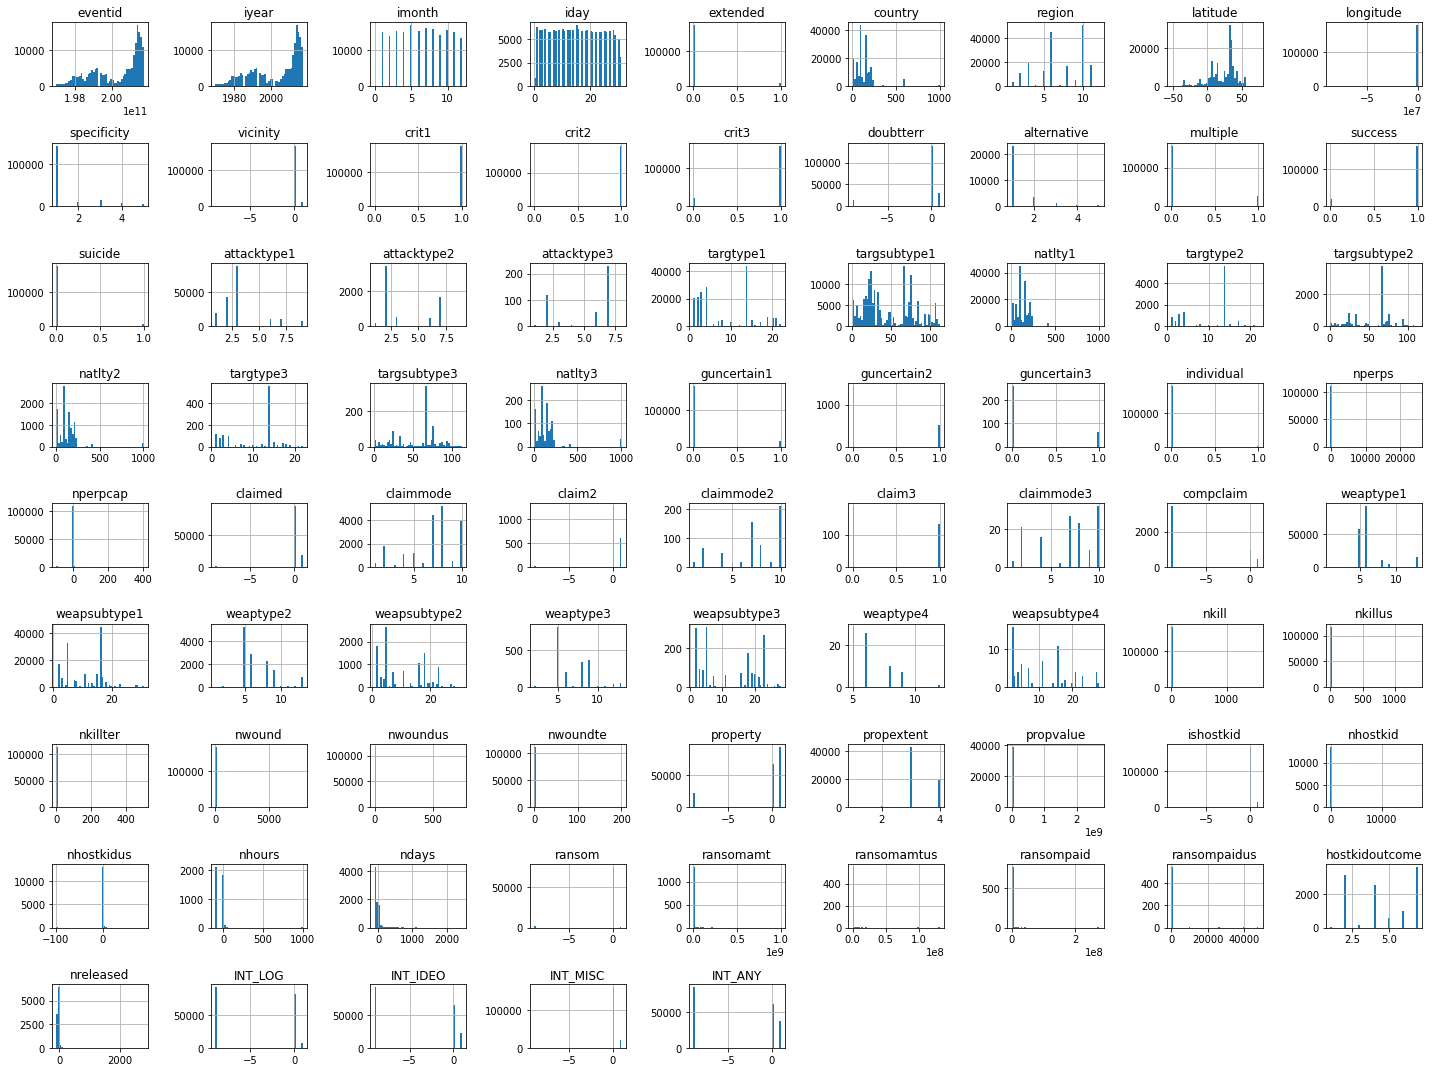

In [189]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


Attributes are  roughly following skewed , Bernoulli , uniform distributions 

<Figure size 576x360 with 0 Axes>

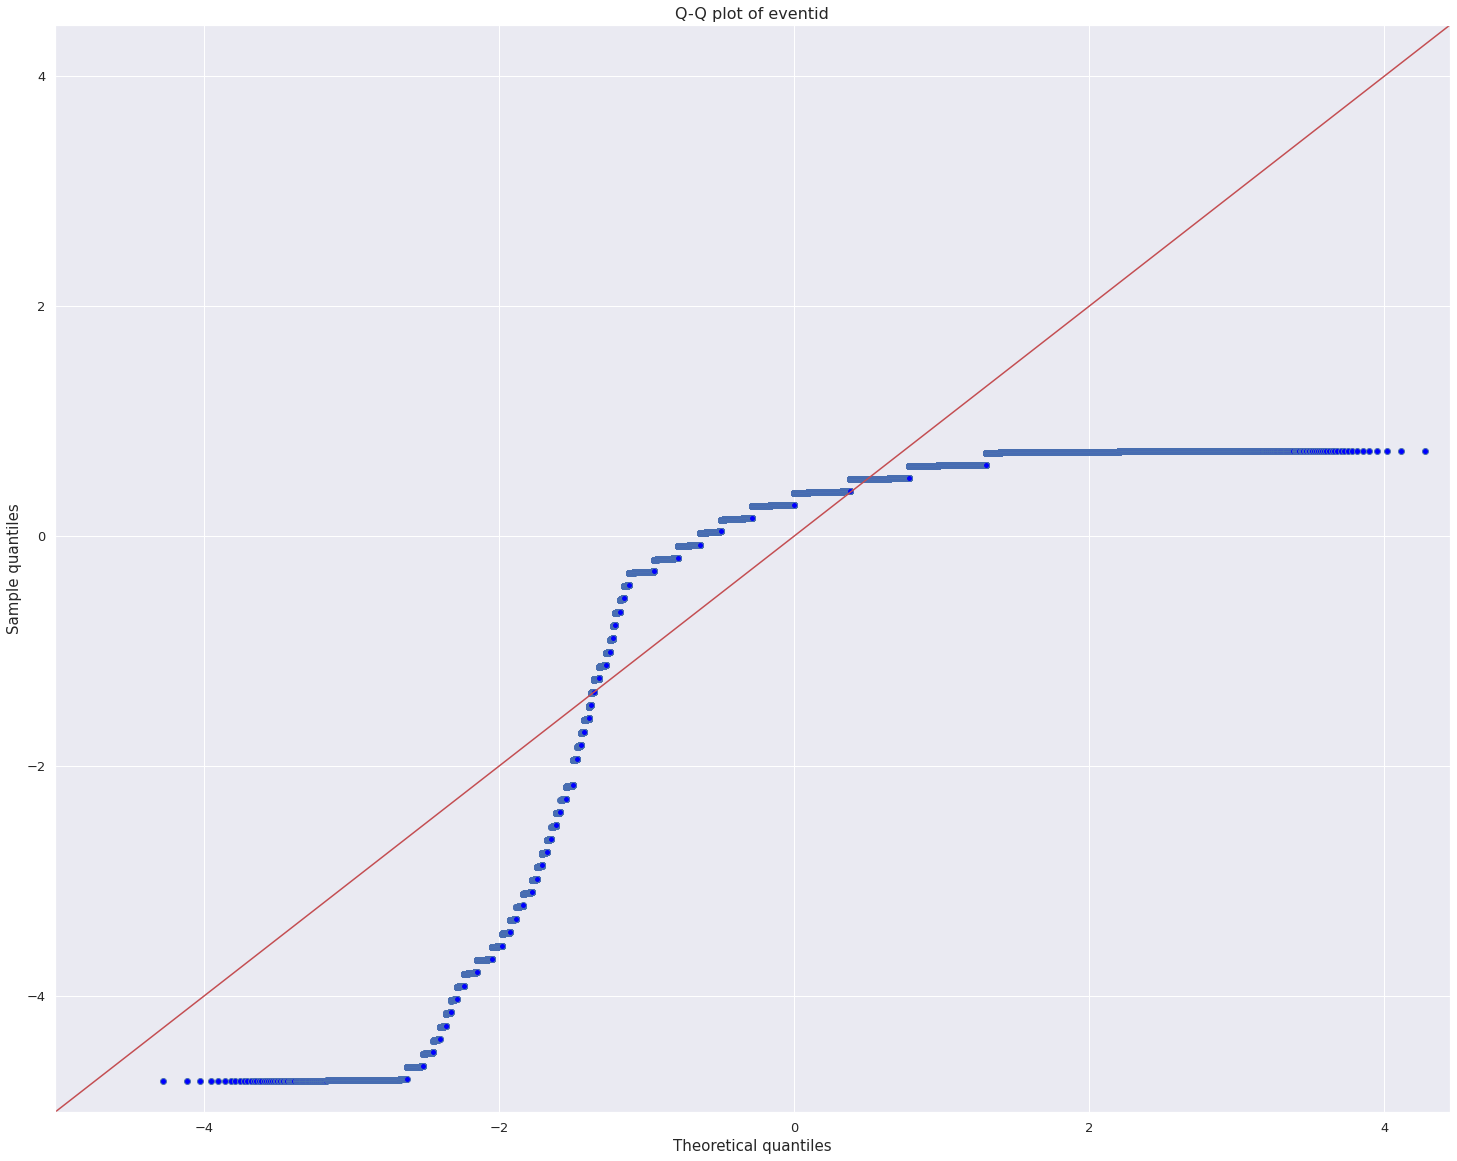

<Figure size 576x360 with 0 Axes>

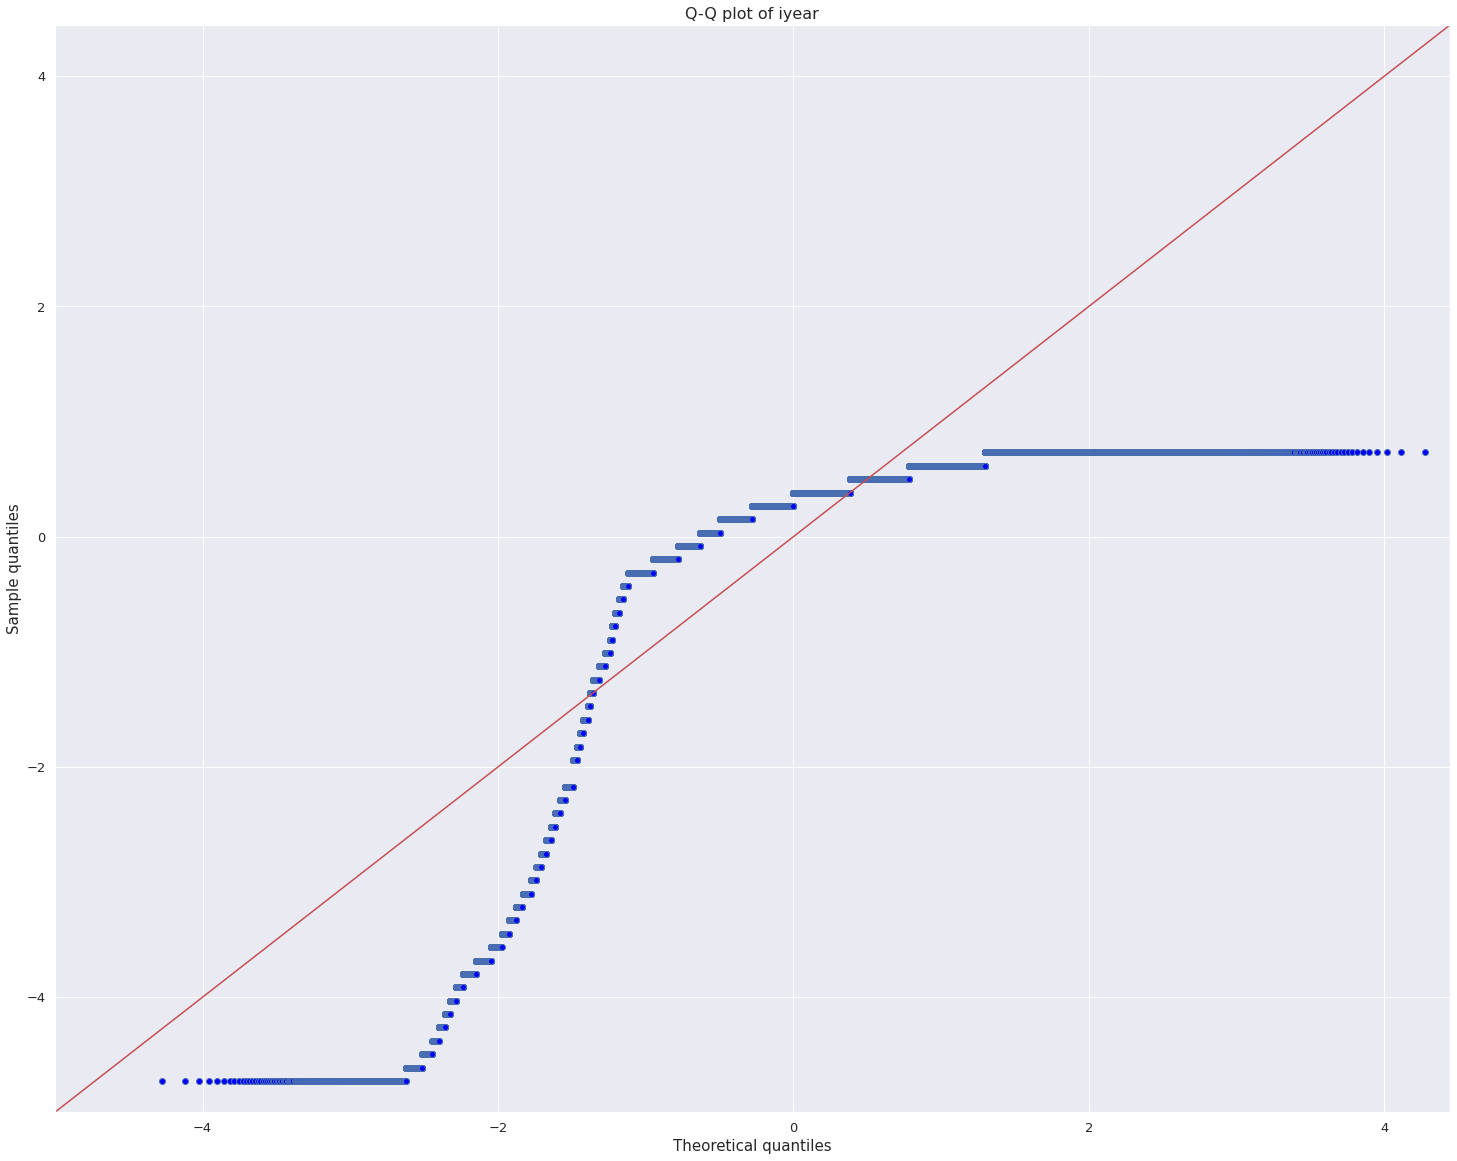

<Figure size 576x360 with 0 Axes>

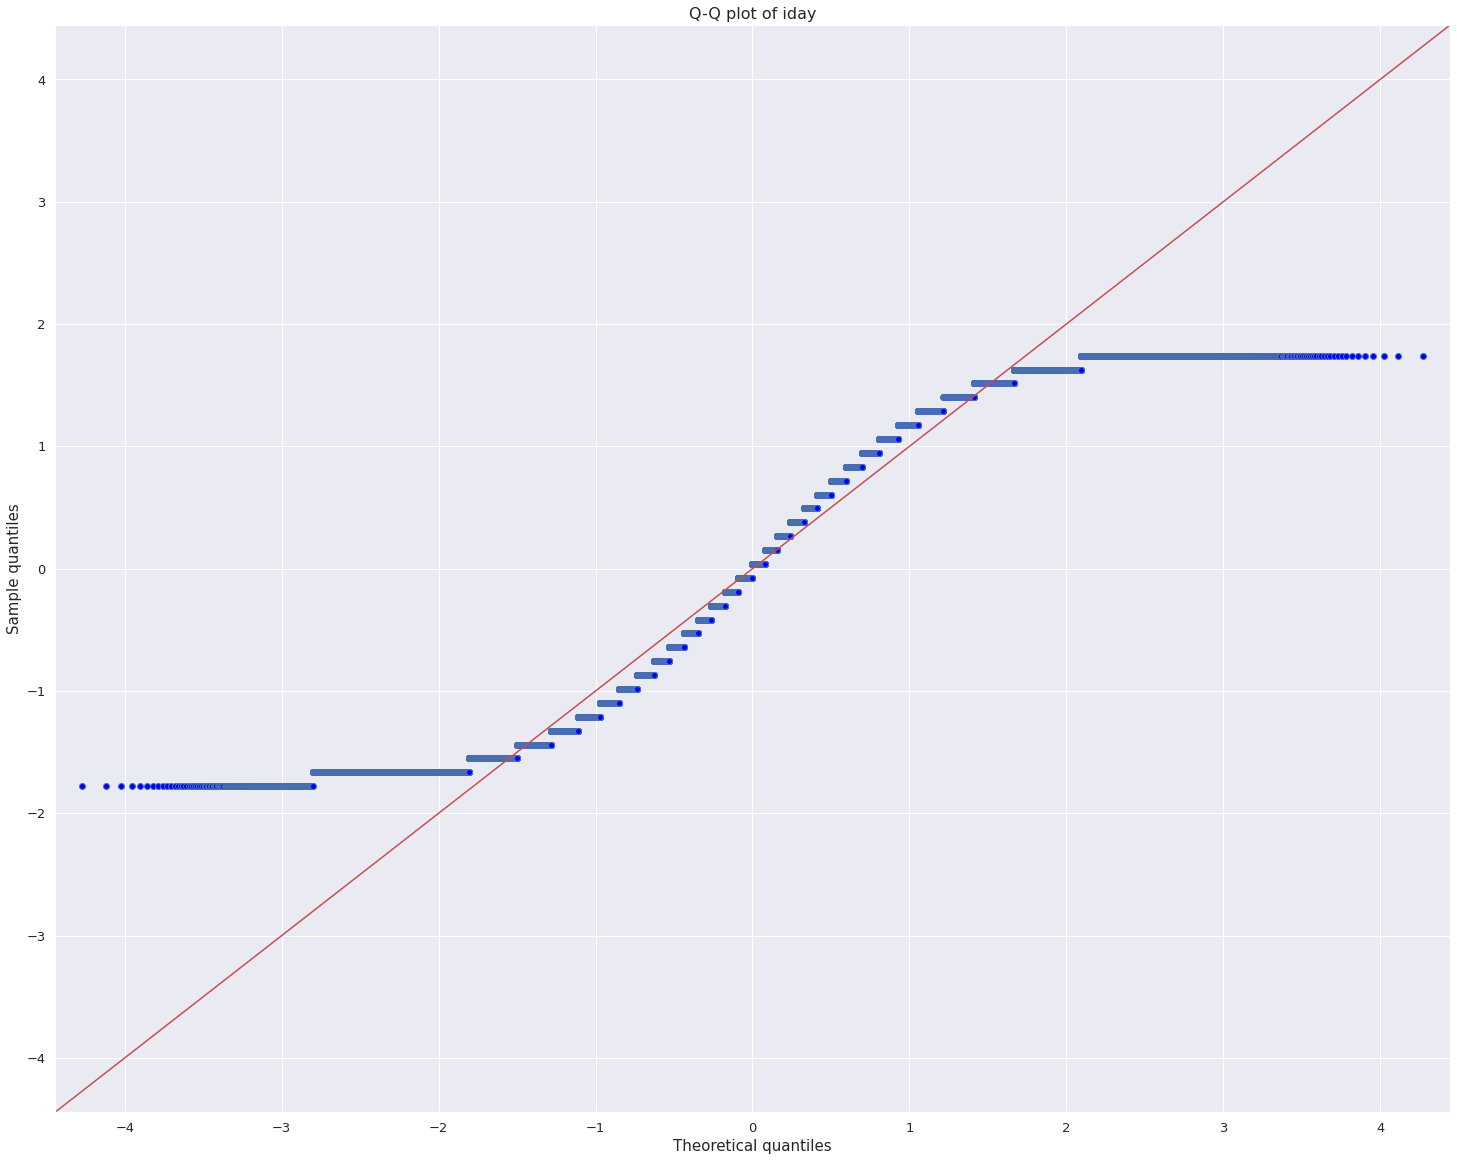

<Figure size 576x360 with 0 Axes>

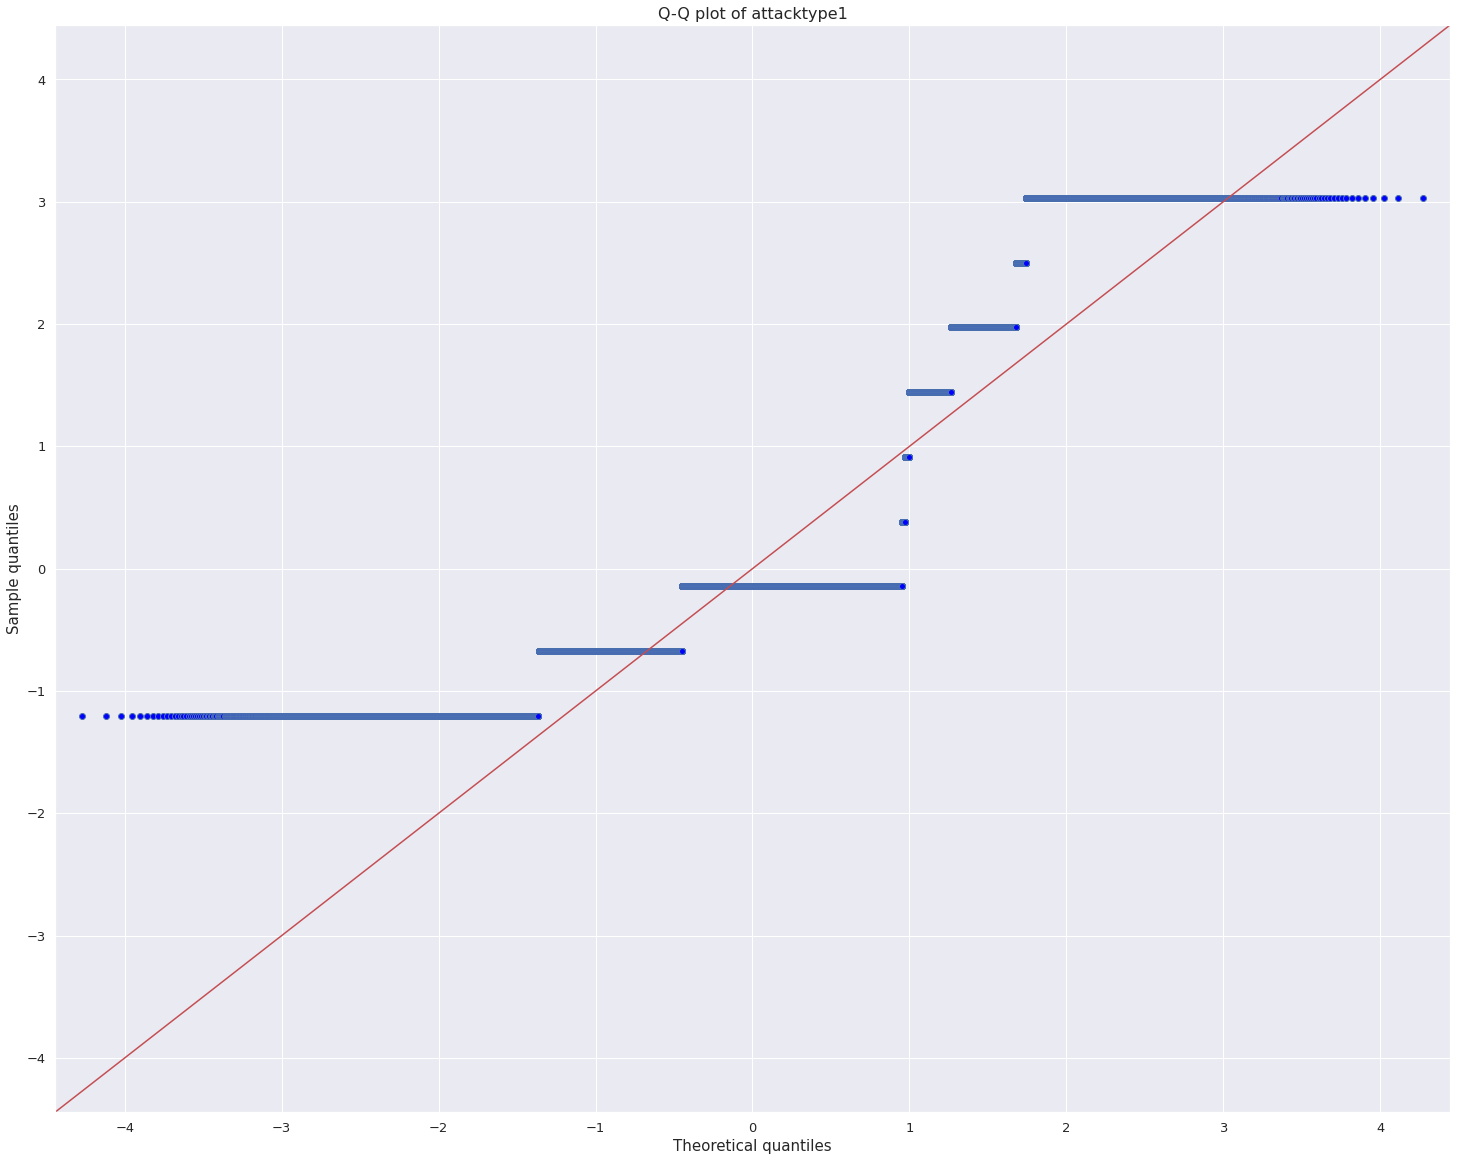

<Figure size 576x360 with 0 Axes>

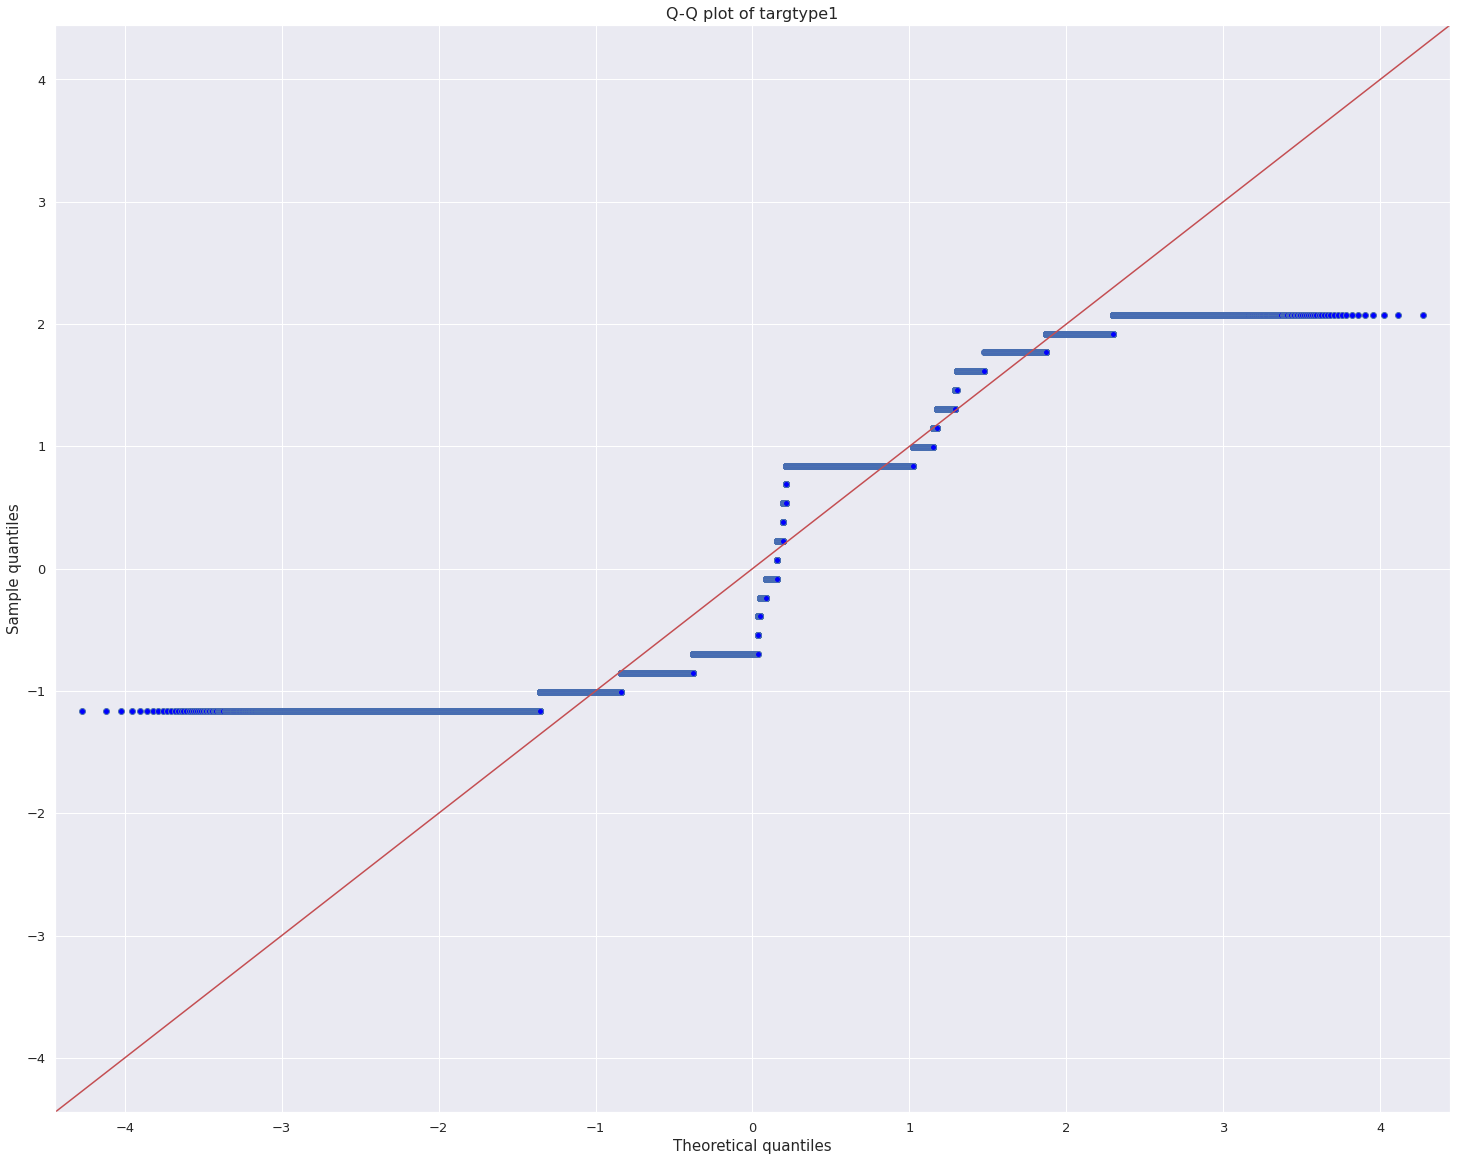

<Figure size 576x360 with 0 Axes>

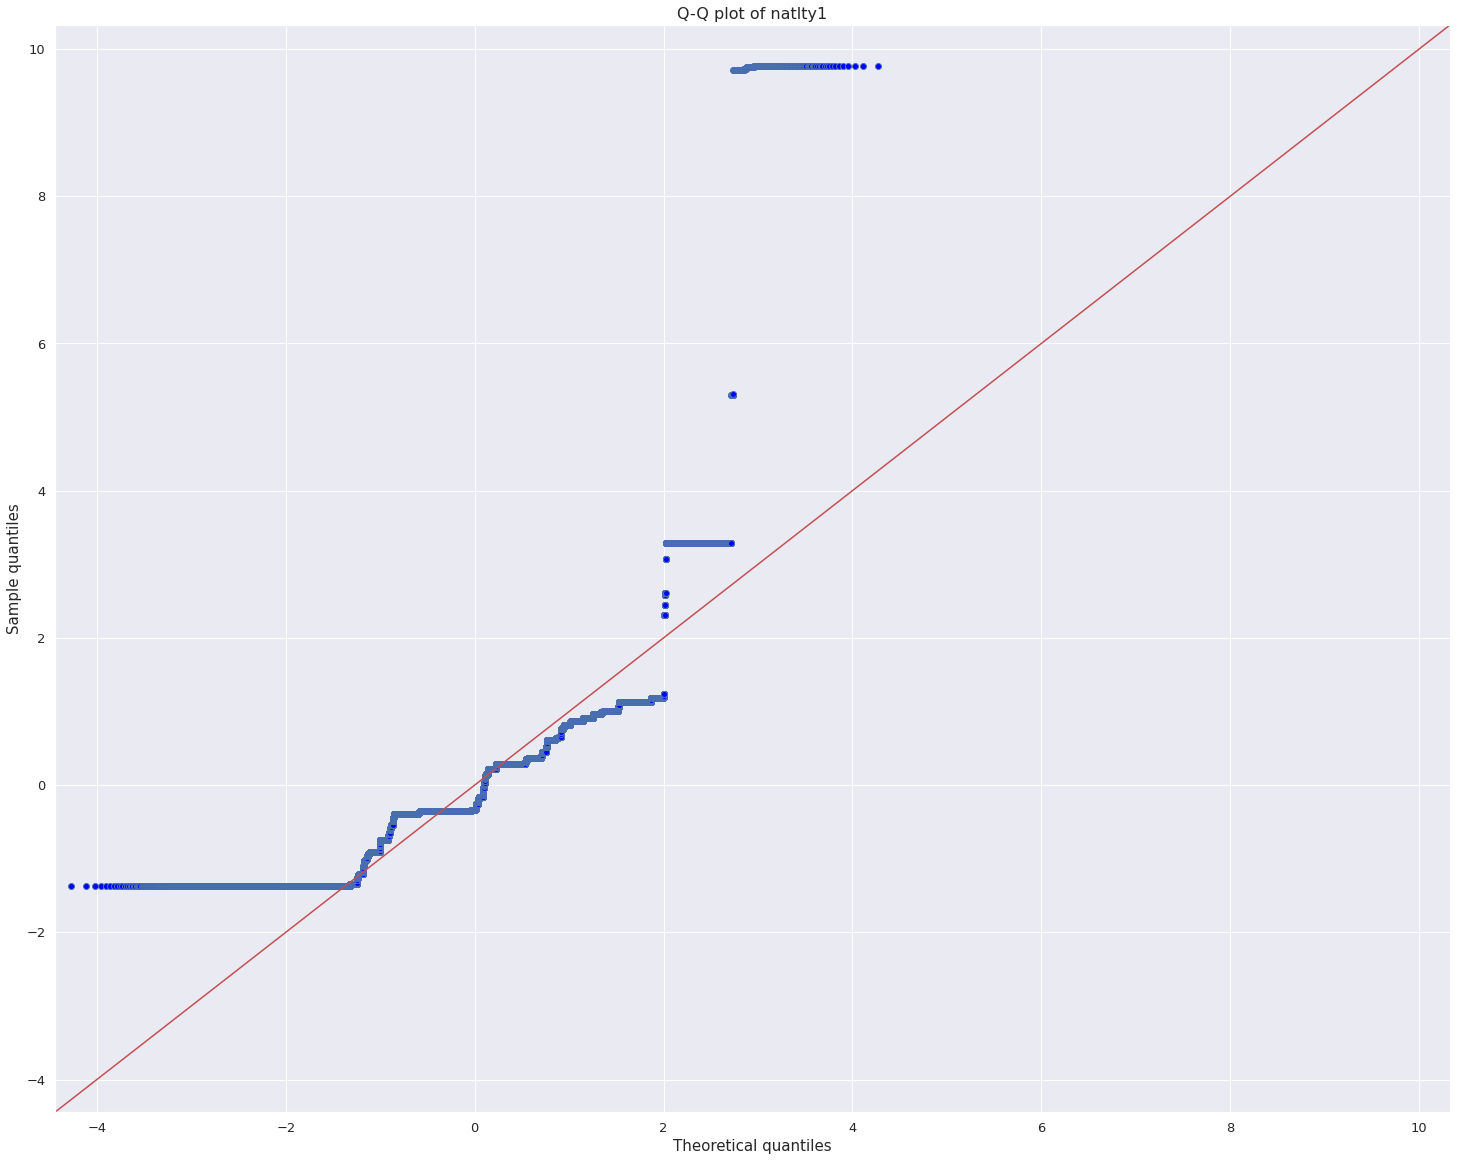

<Figure size 576x360 with 0 Axes>

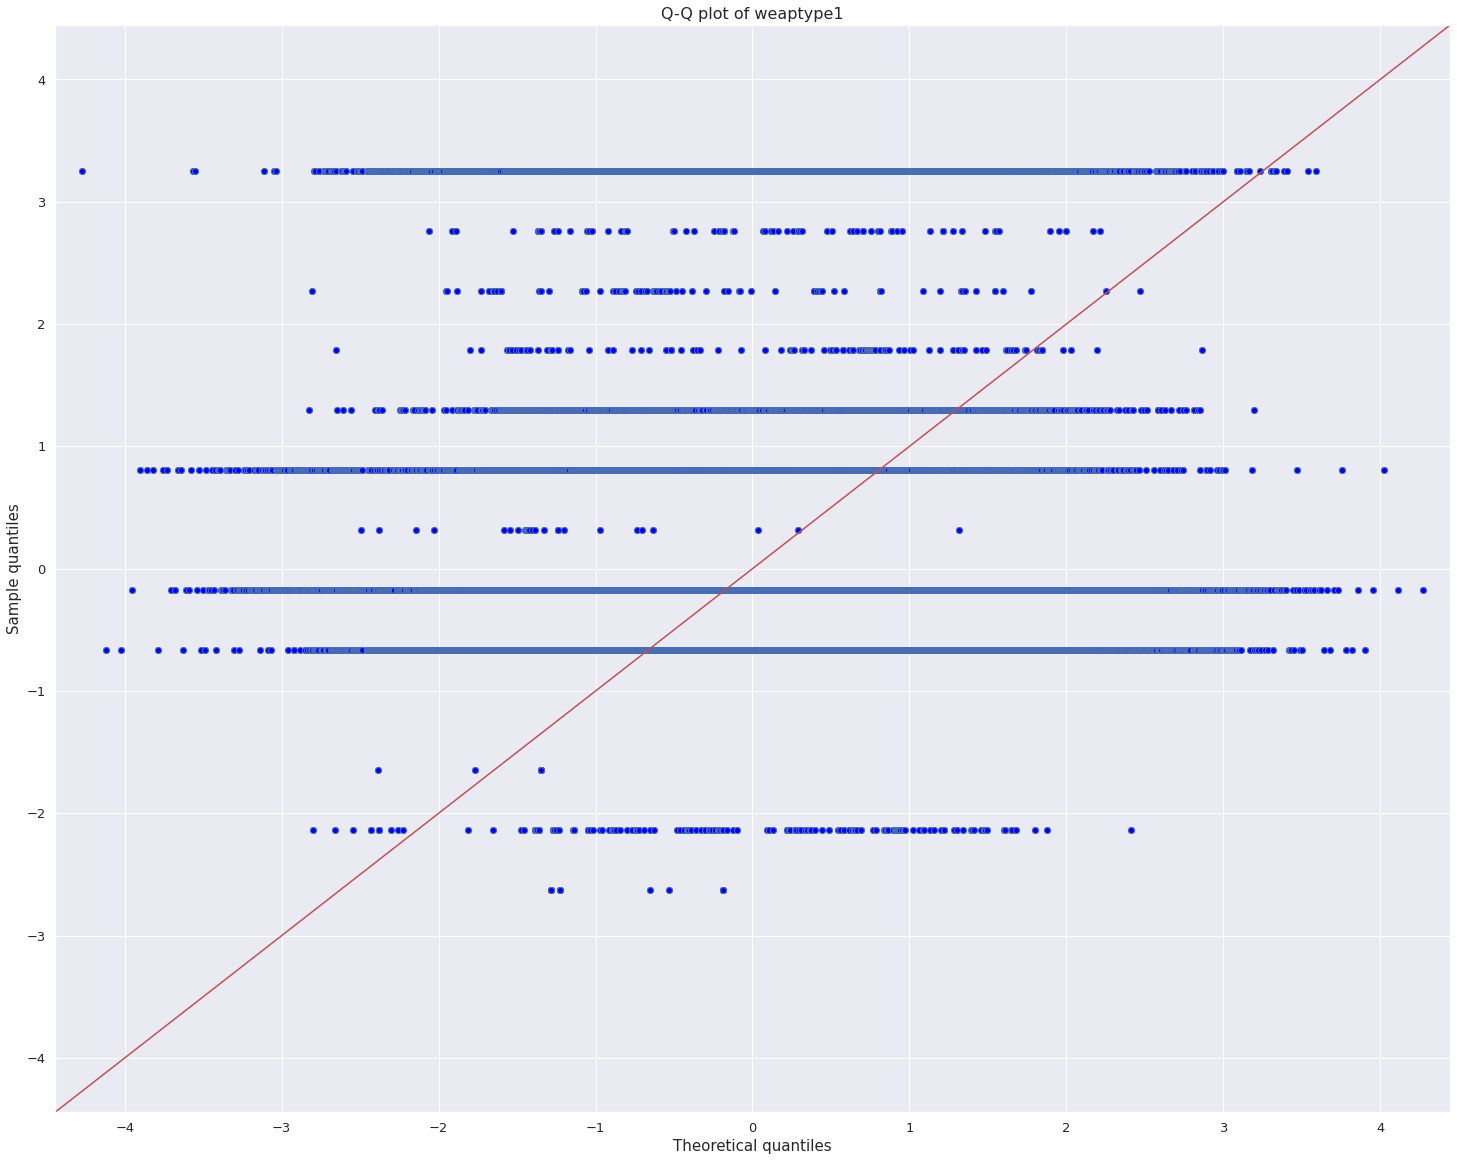

<Figure size 576x360 with 0 Axes>

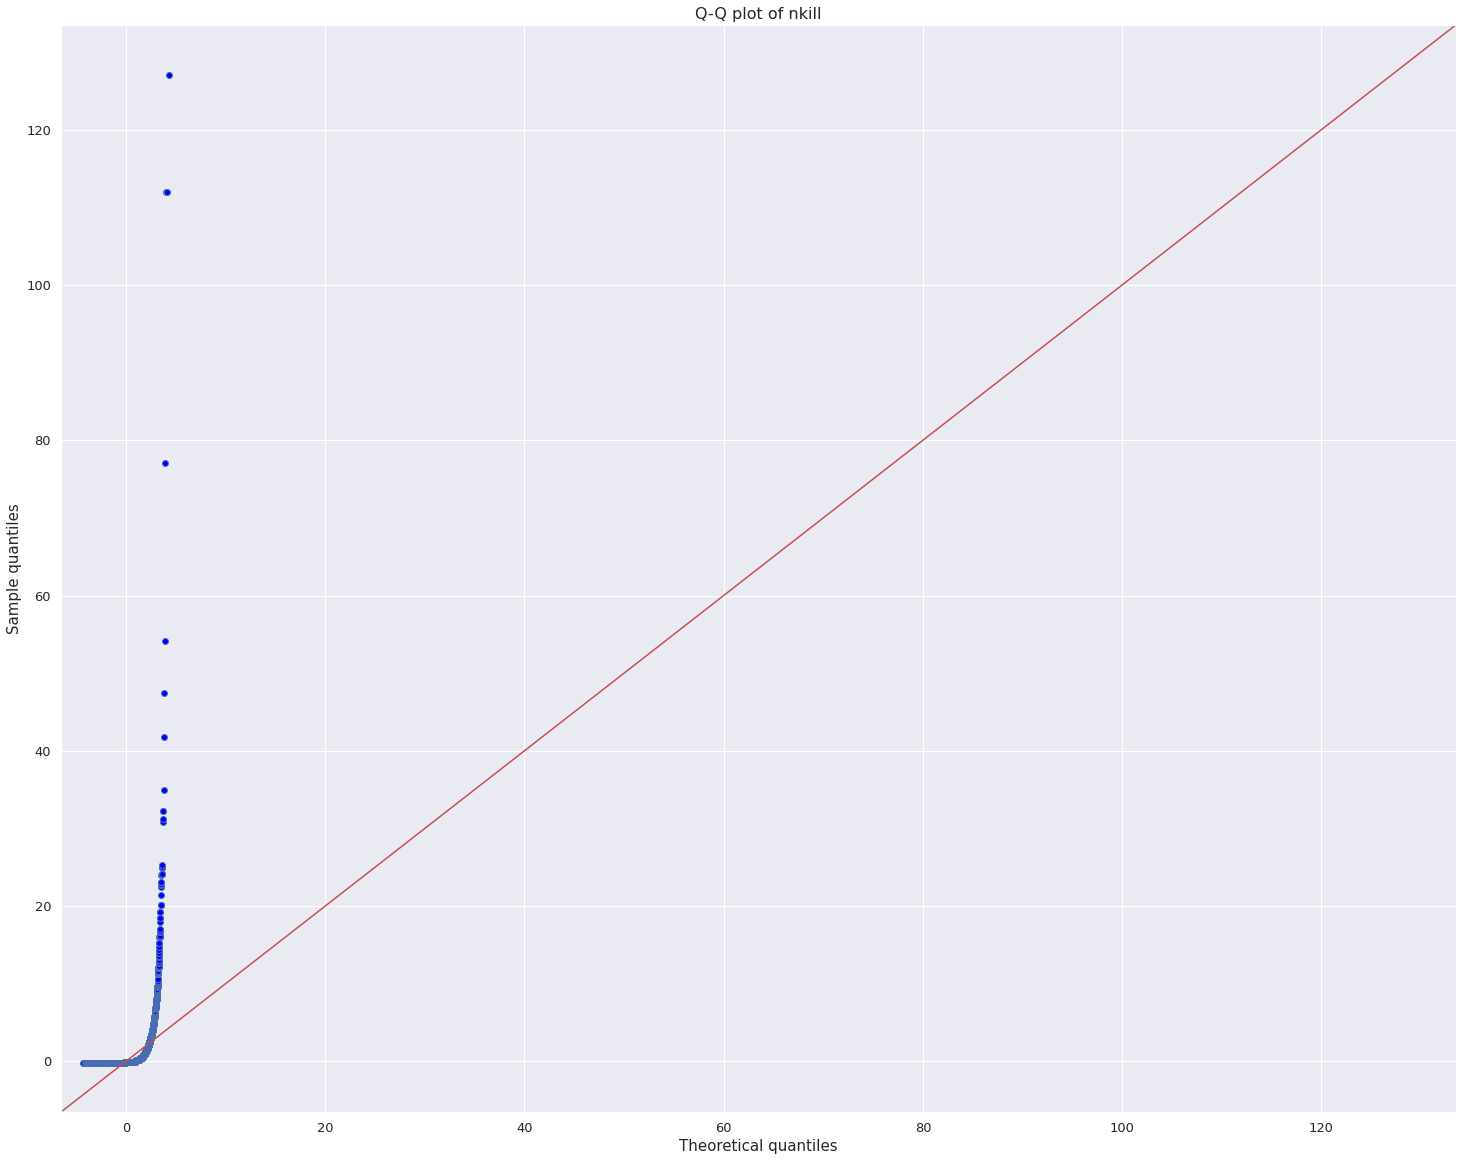

<Figure size 576x360 with 0 Axes>

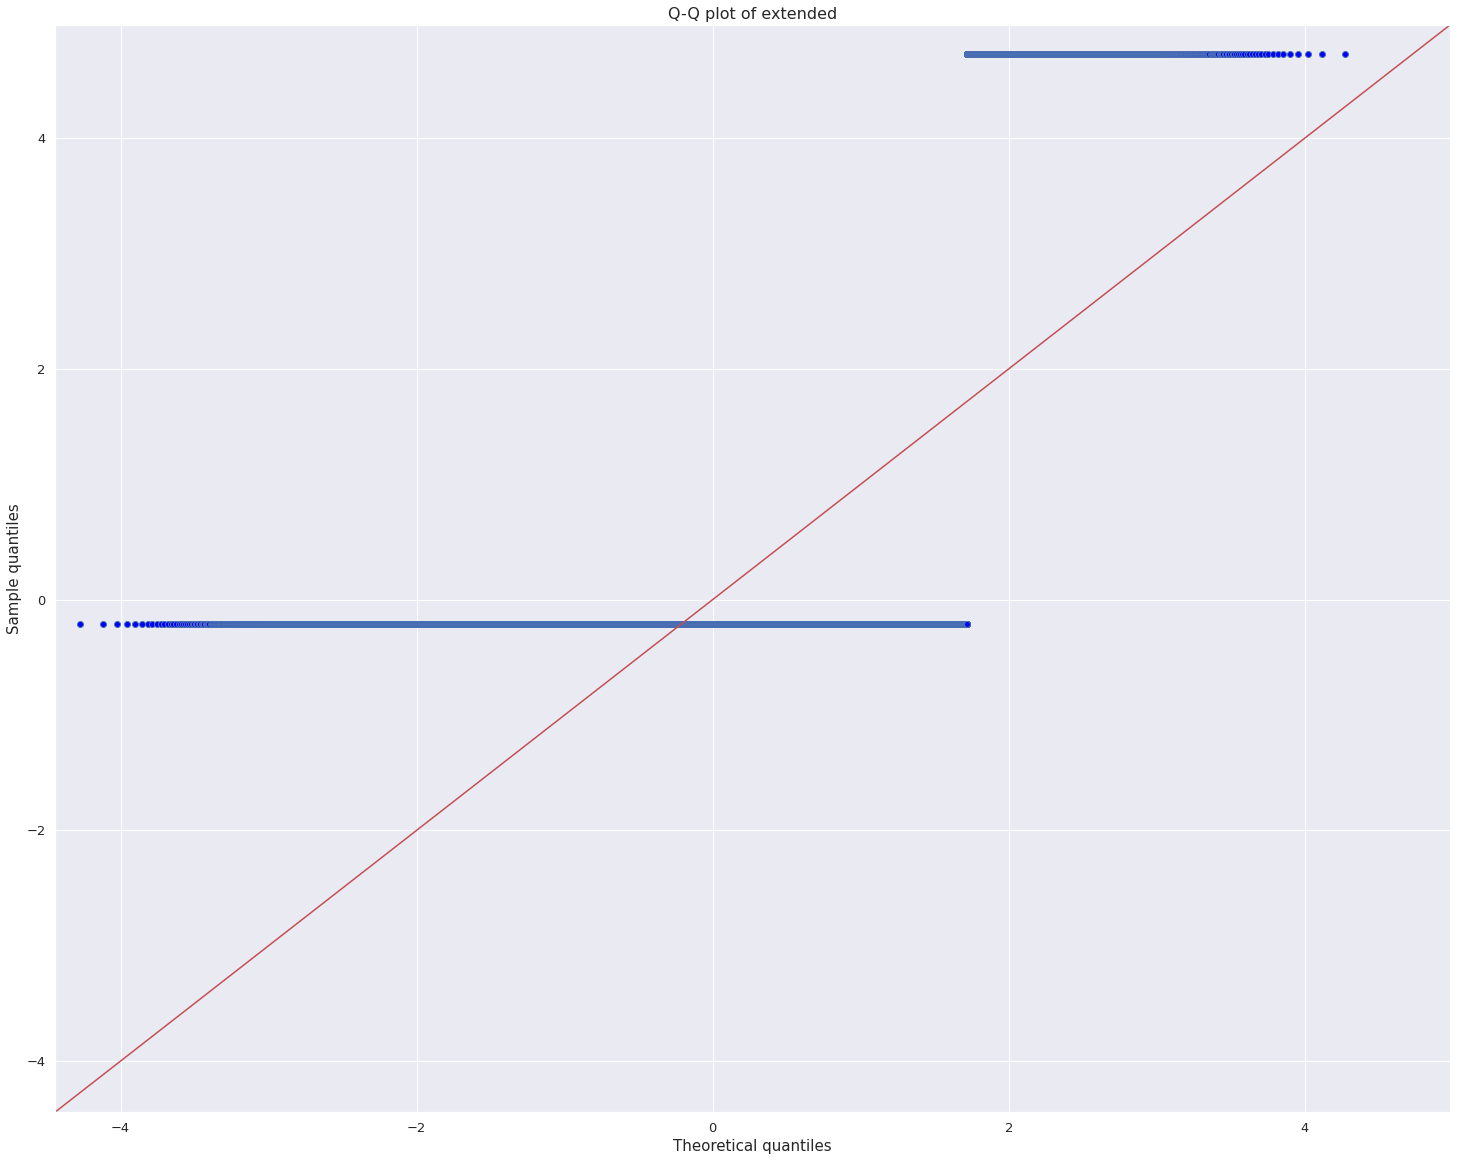

<Figure size 576x360 with 0 Axes>

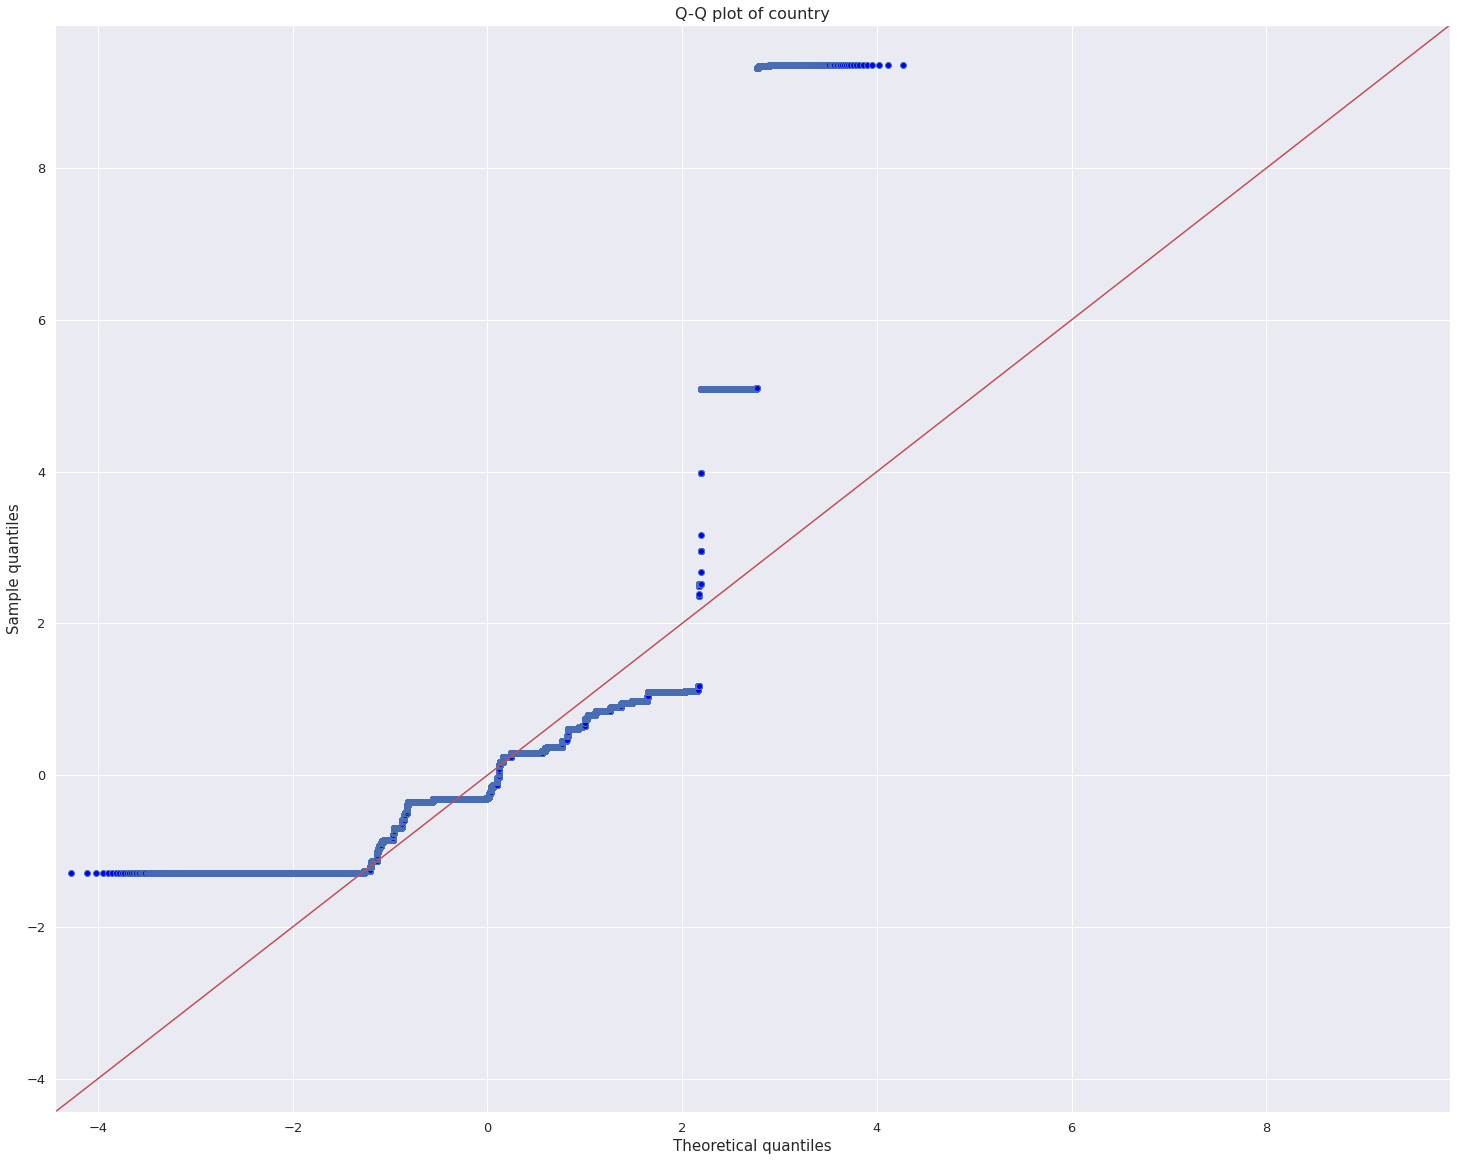

<Figure size 576x360 with 0 Axes>

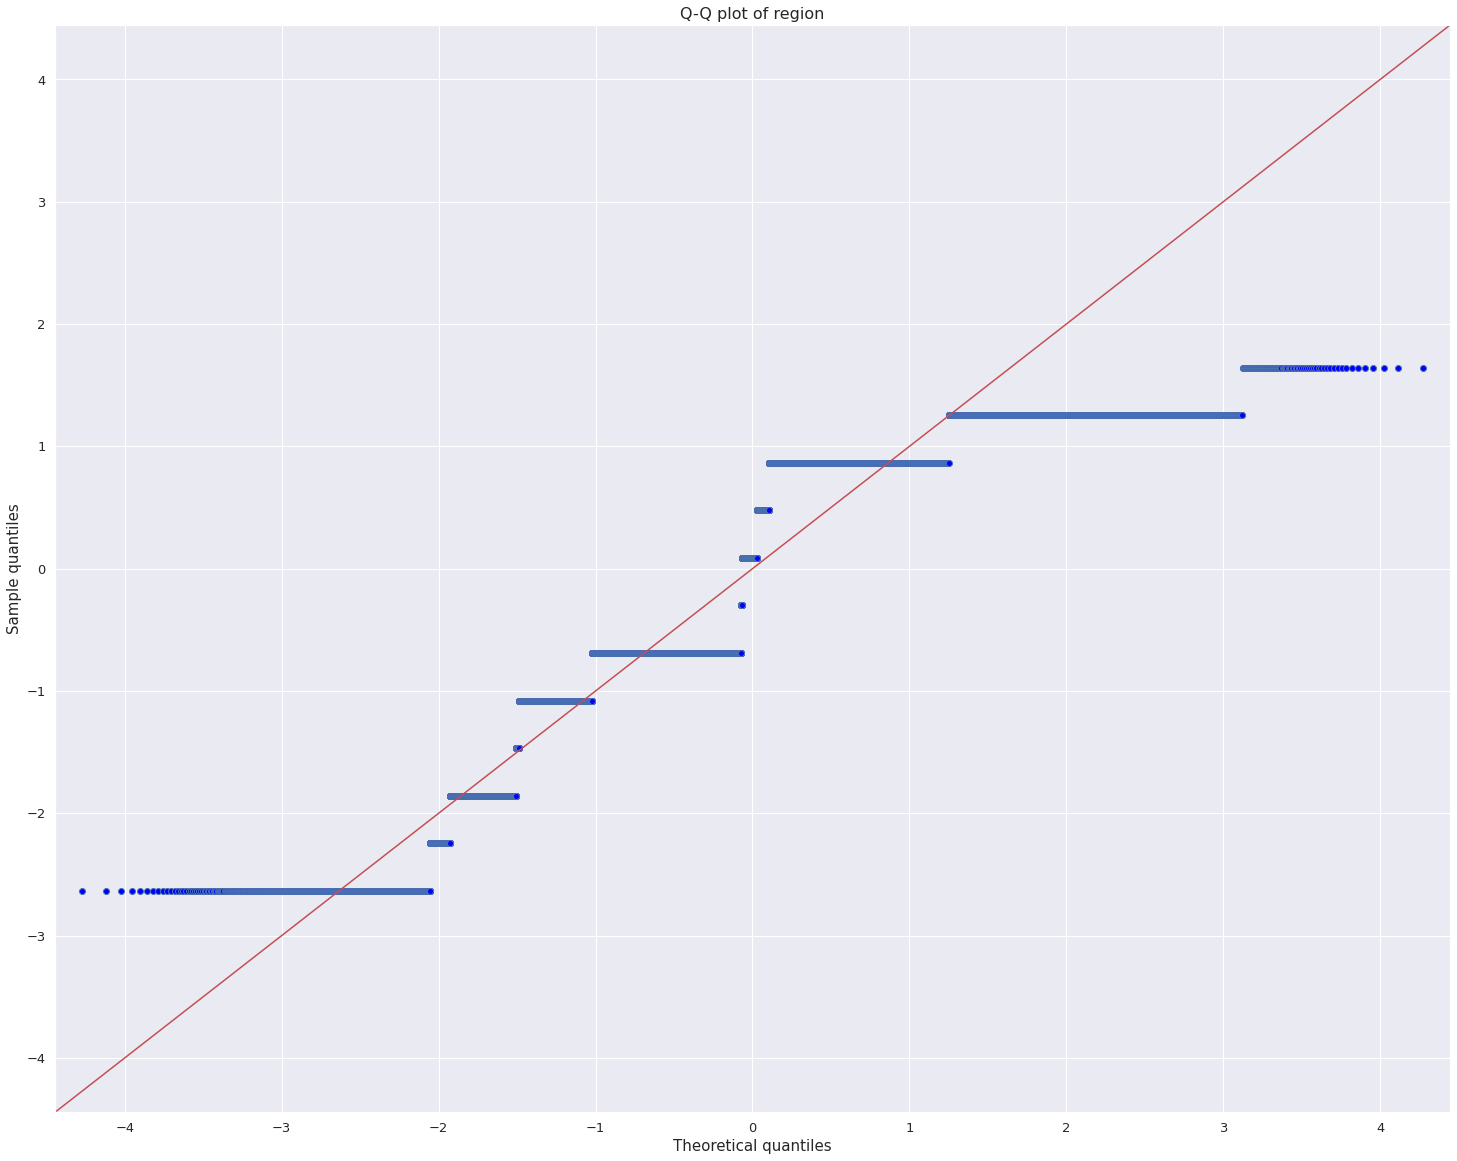

<Figure size 576x360 with 0 Axes>

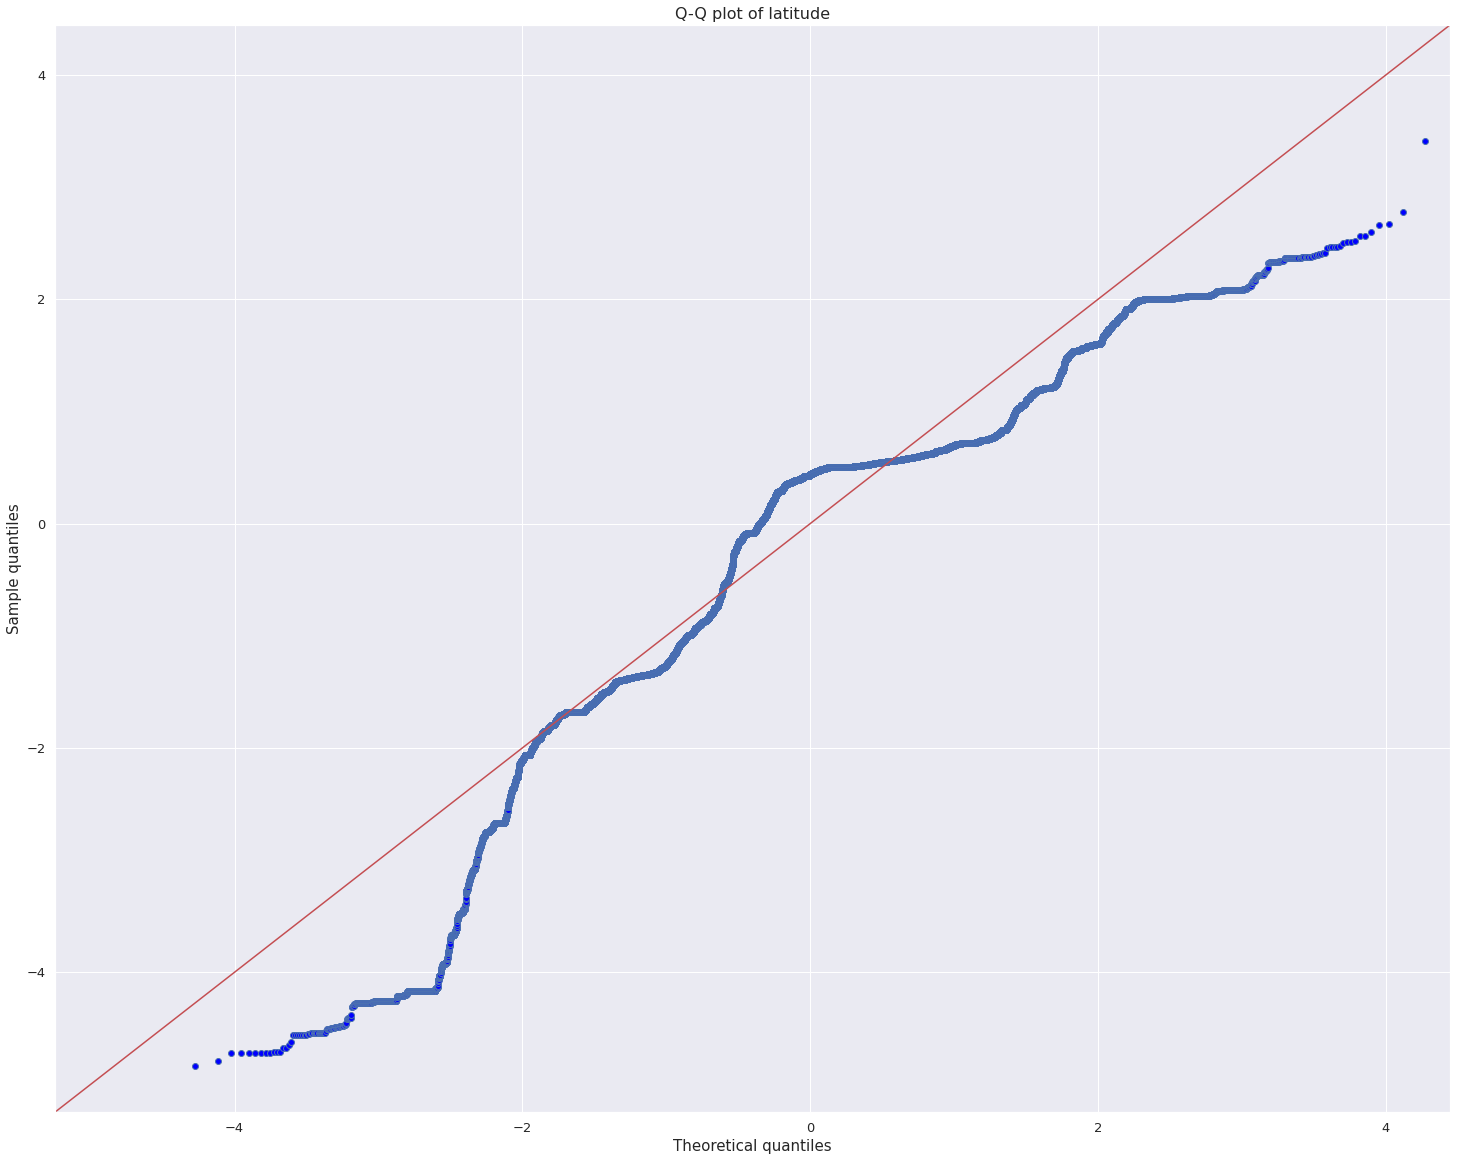

<Figure size 576x360 with 0 Axes>

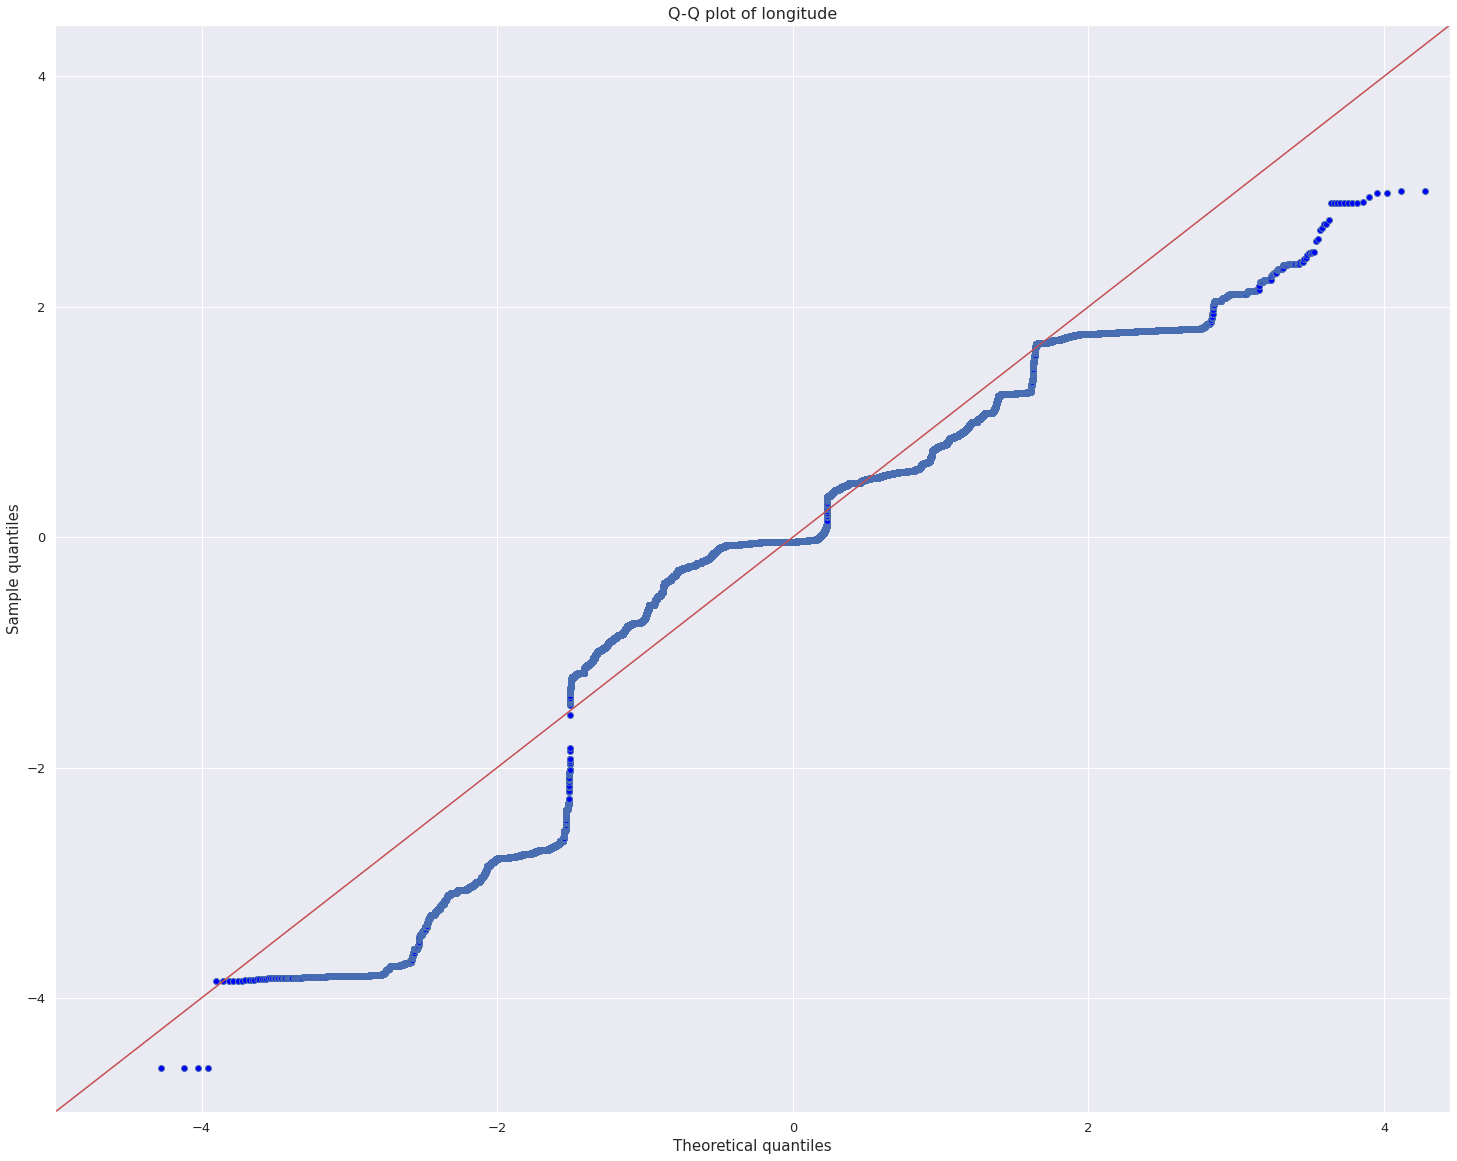

<Figure size 576x360 with 0 Axes>

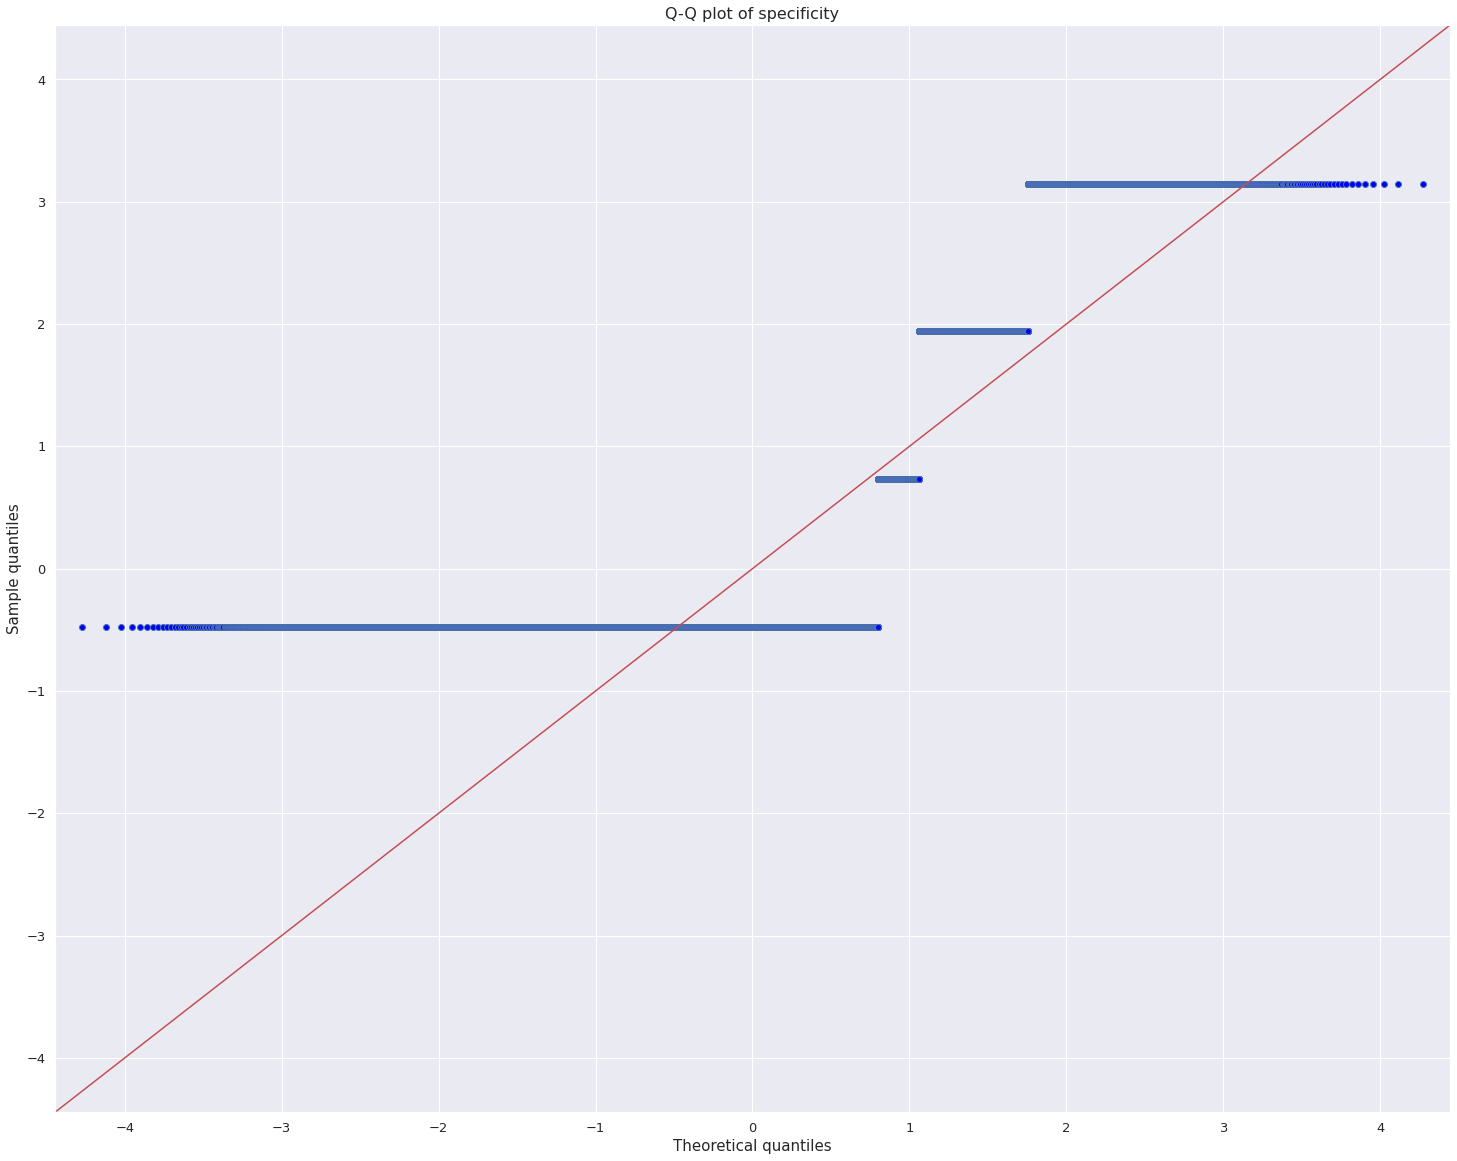

<Figure size 576x360 with 0 Axes>

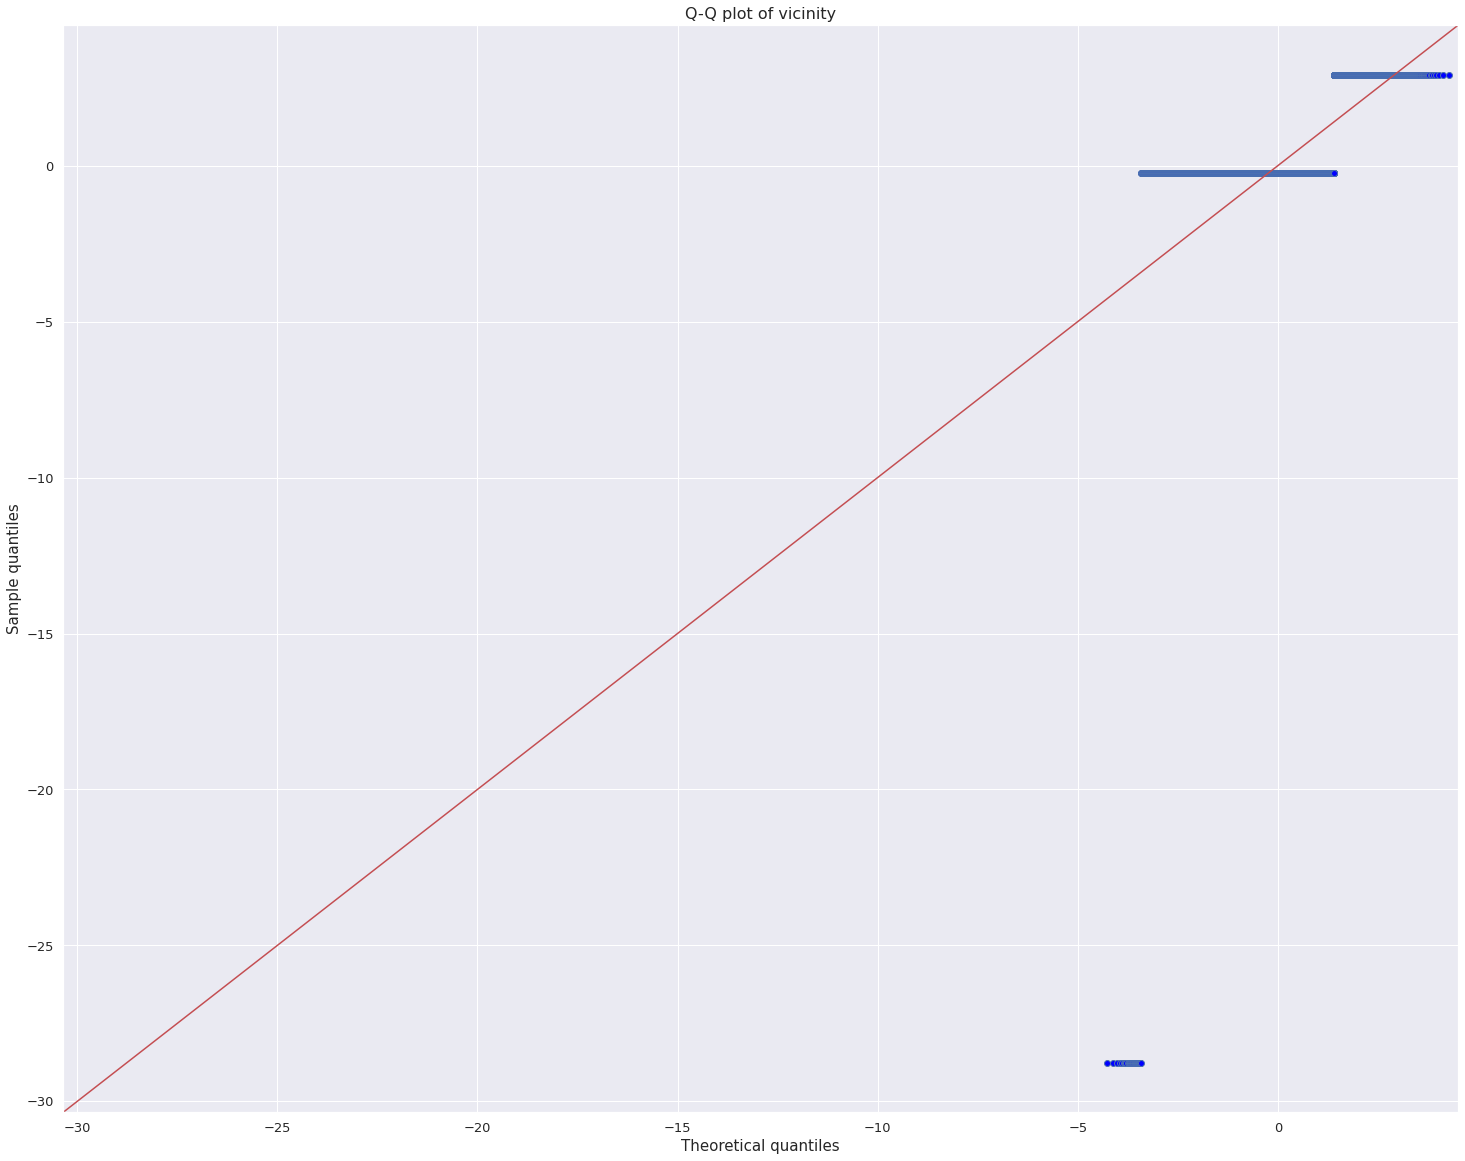

<Figure size 576x360 with 0 Axes>

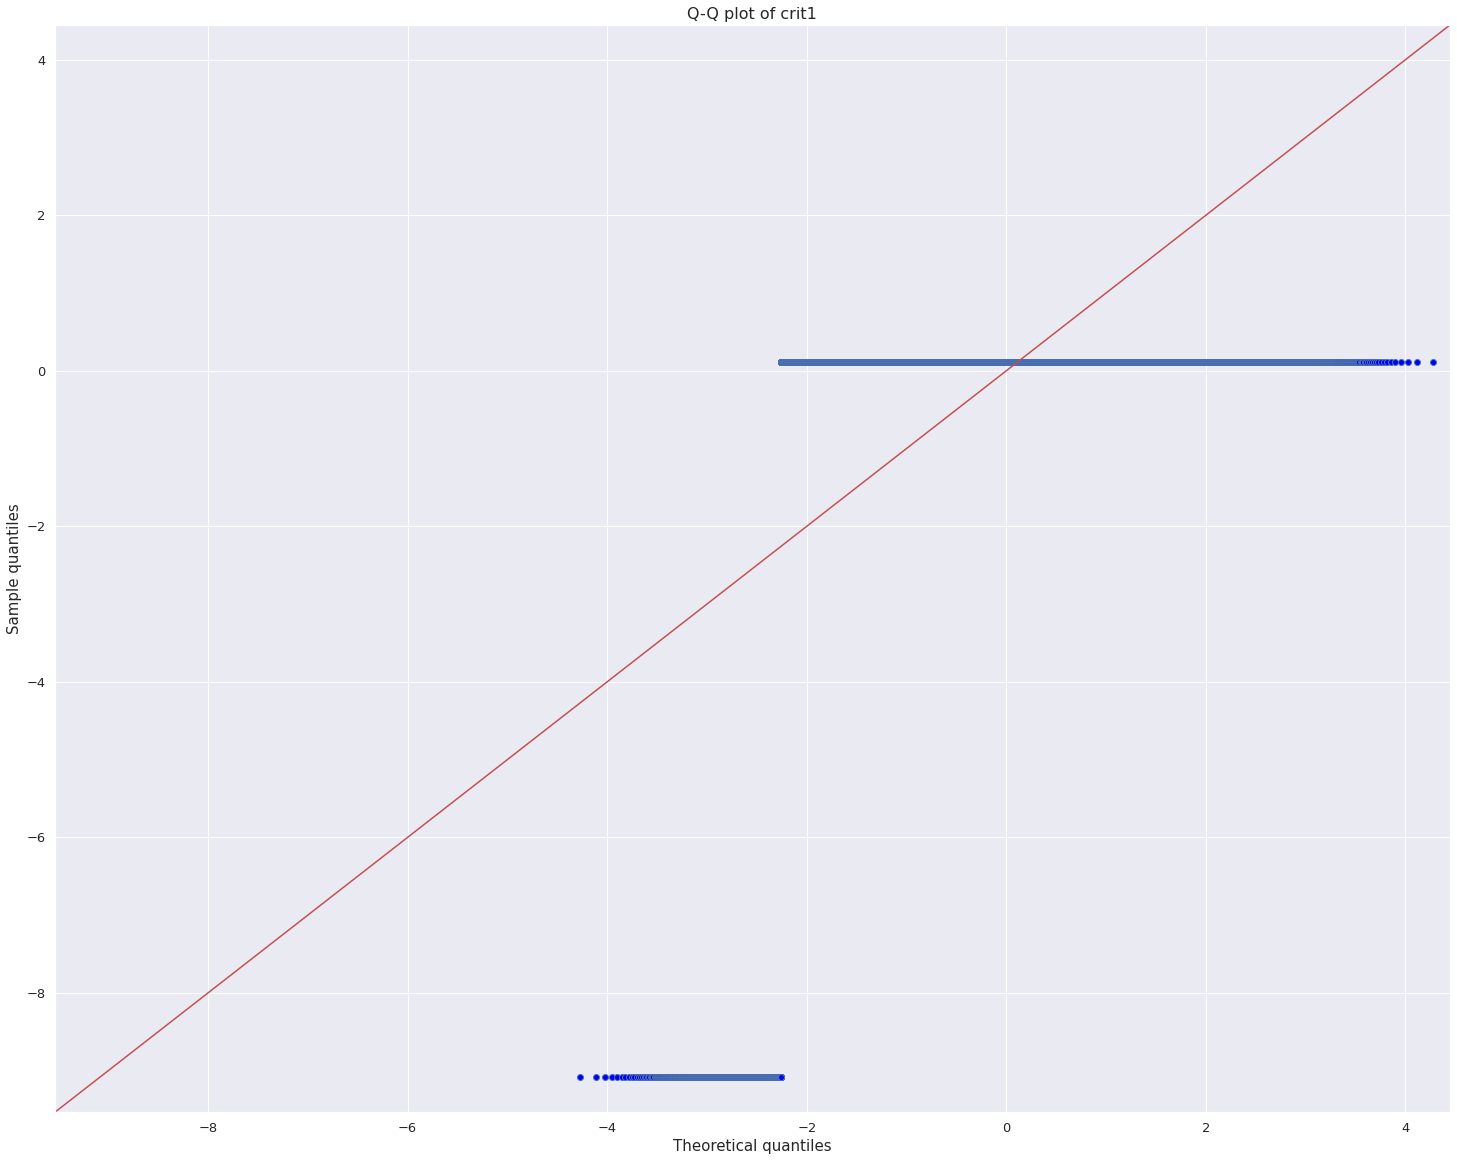

<Figure size 576x360 with 0 Axes>

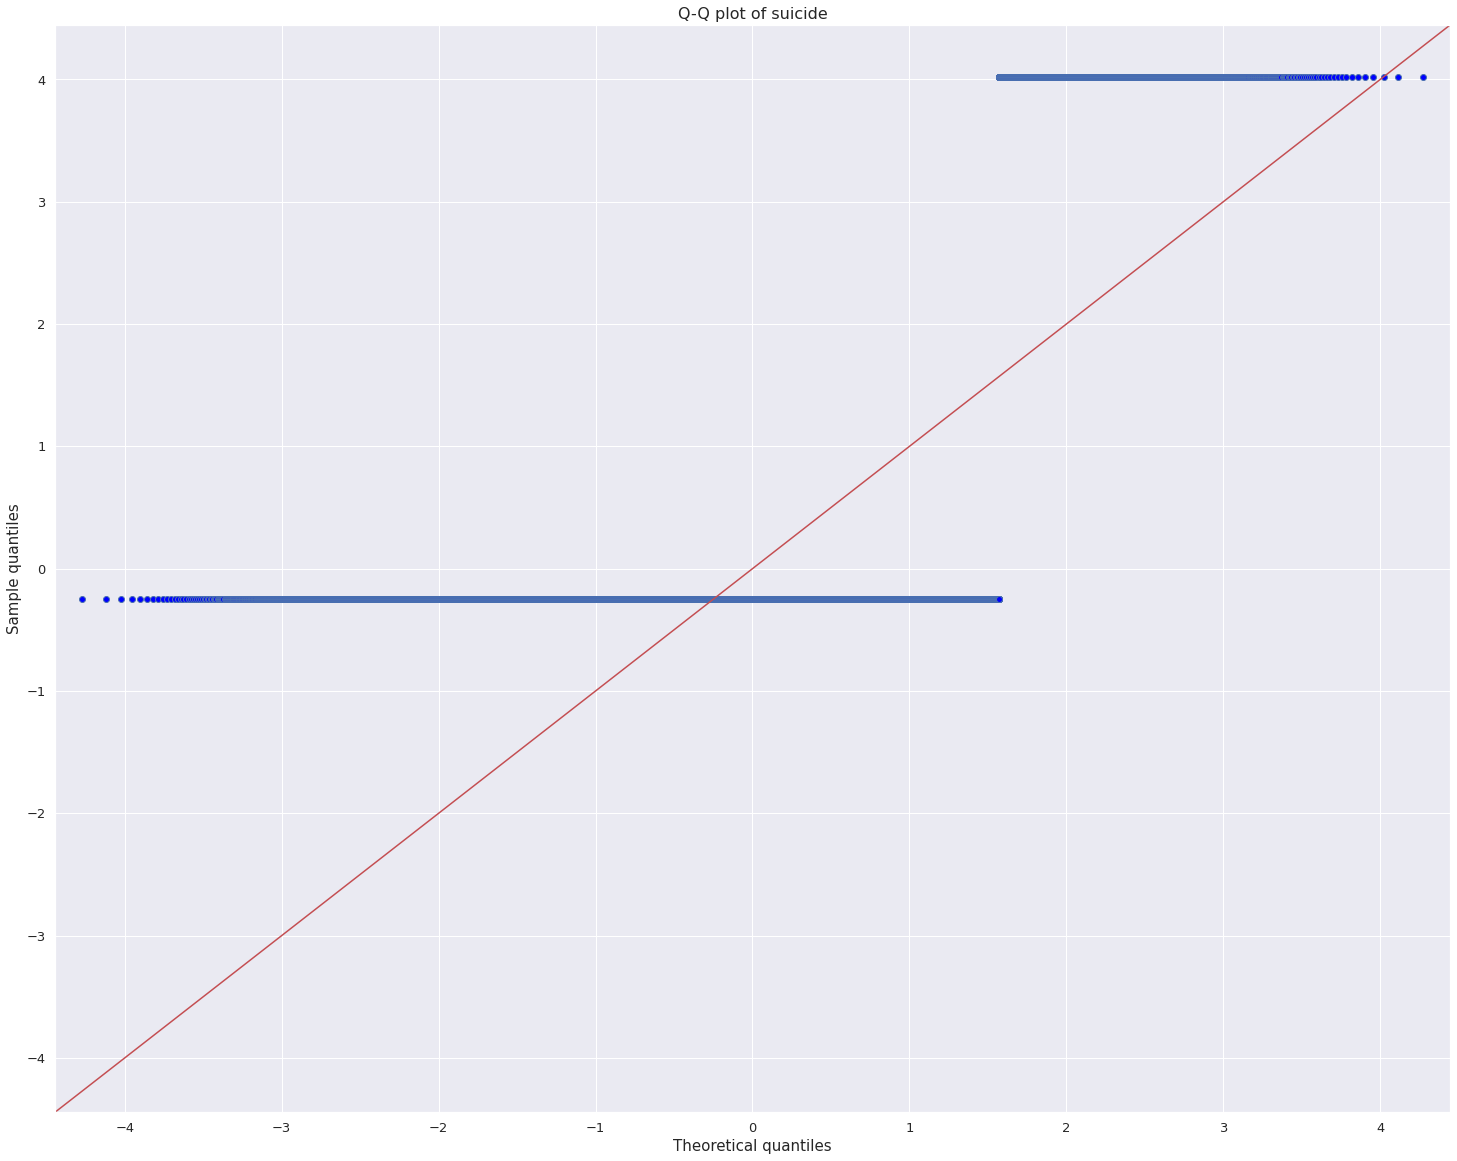

<Figure size 576x360 with 0 Axes>

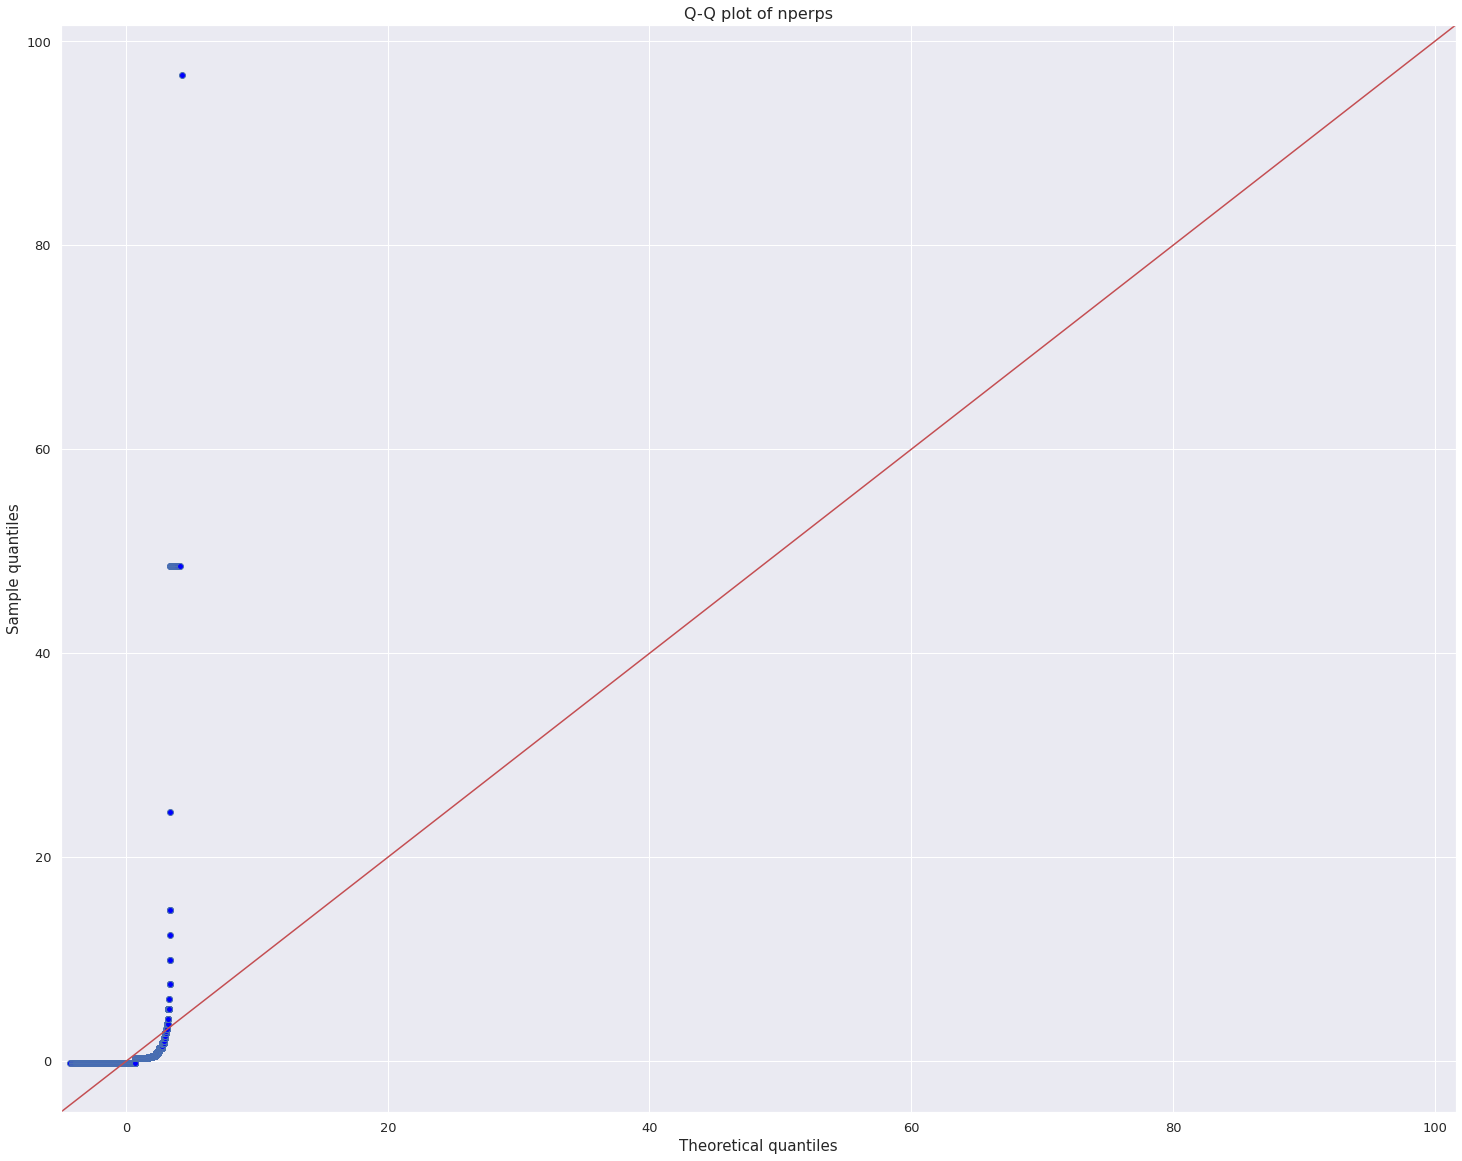

<Figure size 576x360 with 0 Axes>

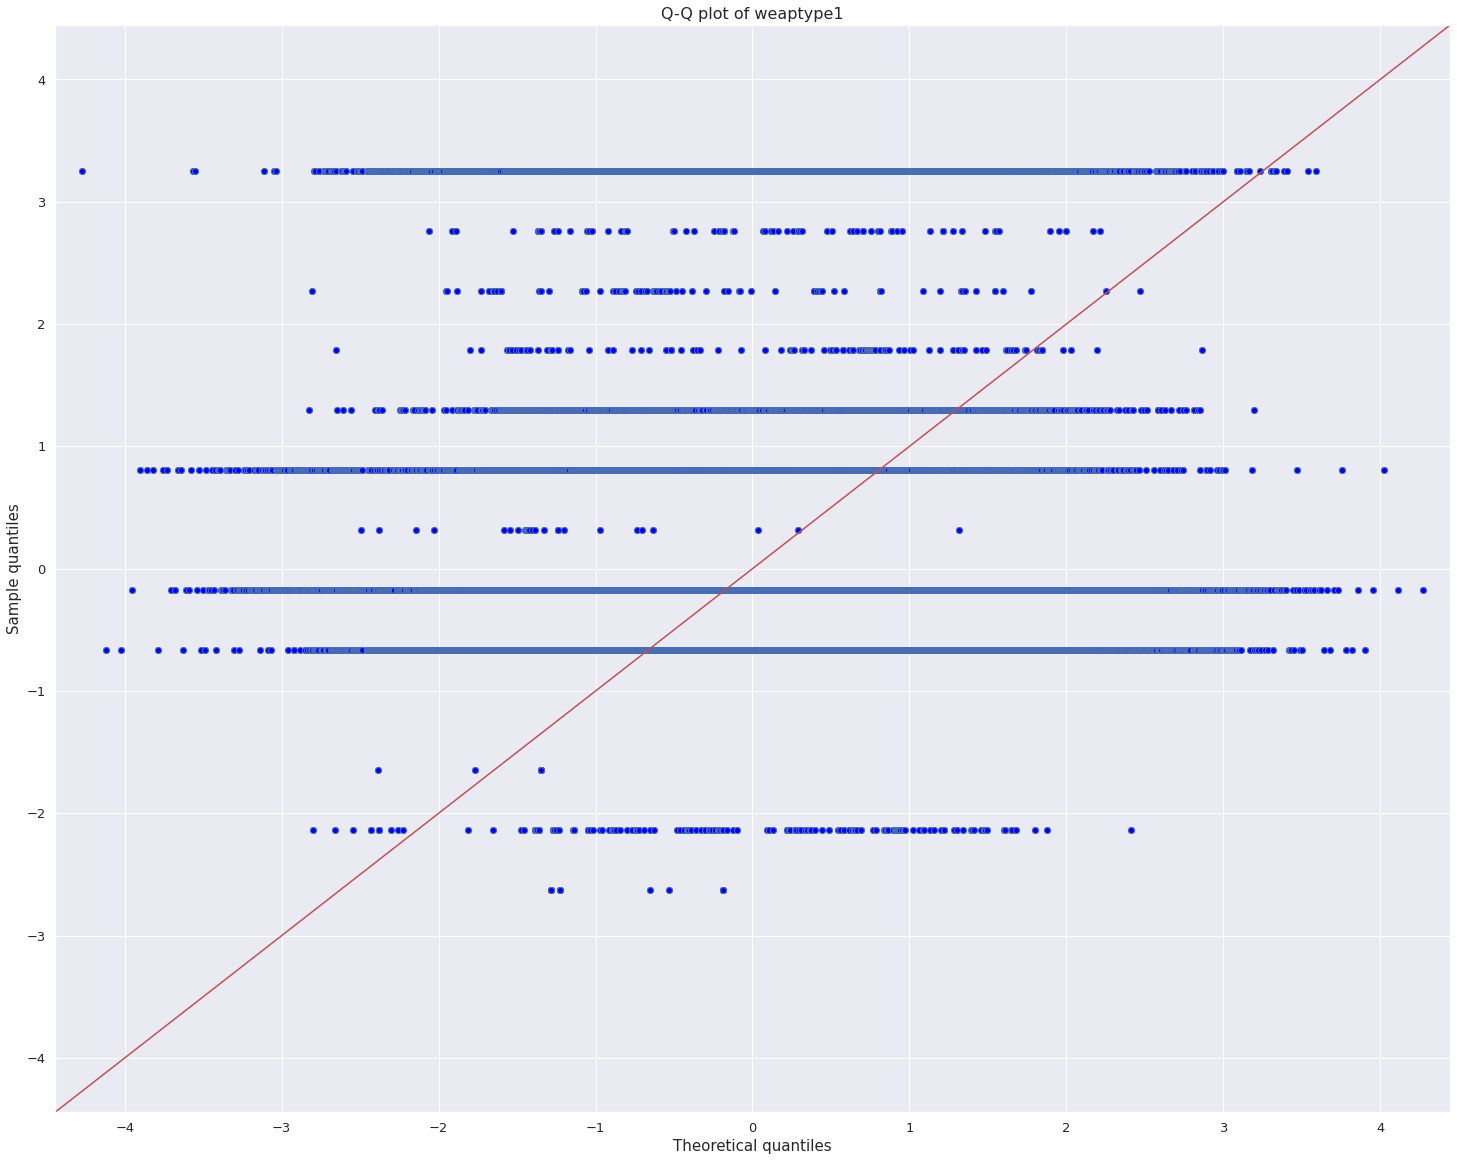

In [193]:
from statsmodels.graphics.gofplots import qqplot
data_norm= X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

What are the distributions of the predictor variables?


According to the QP plots and histogram , The predicted variables are roughly following skewed , Bernoulli , uniform distributions 

In [121]:
df1= df[["eventid","iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps","weaptype1"]]

In [122]:
terror = df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=False)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']

terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [123]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [124]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


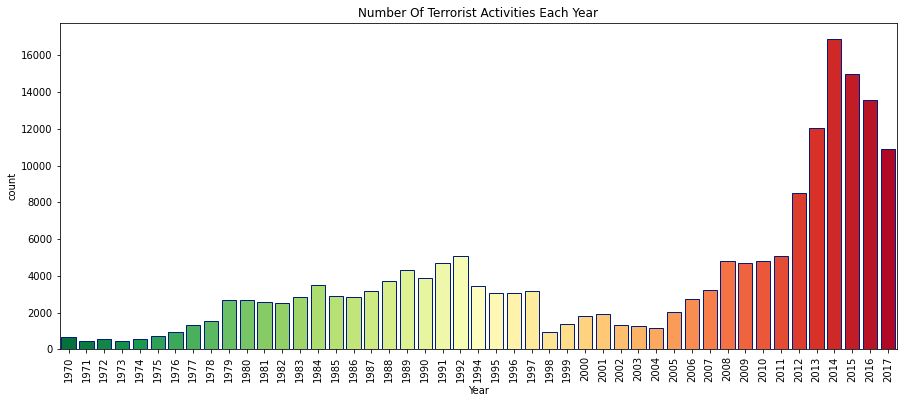

In [125]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


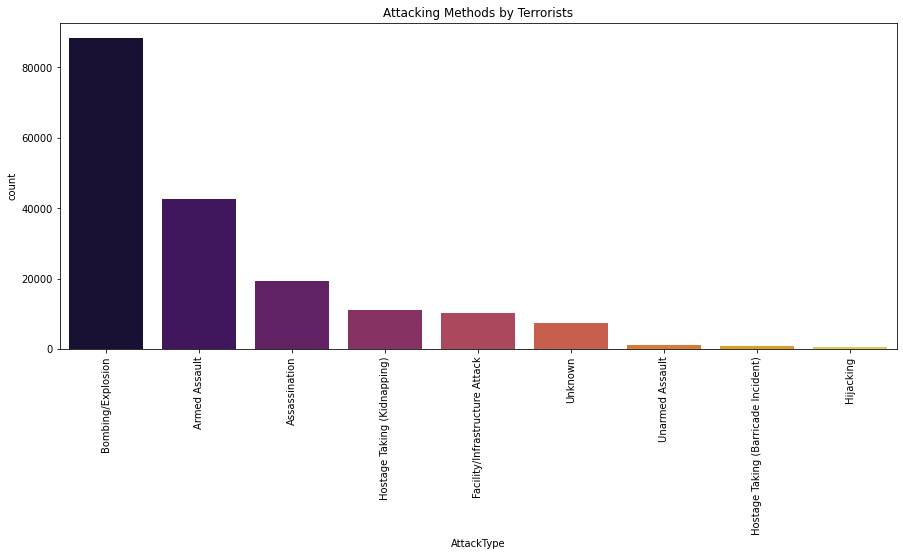

In [126]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


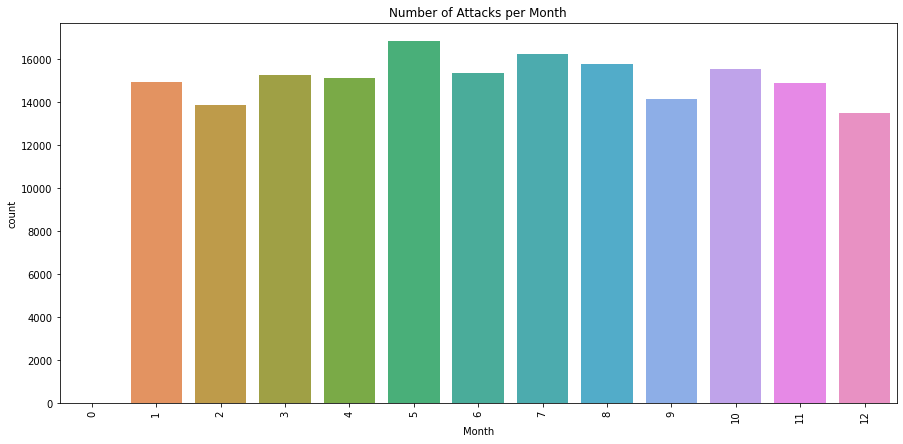

In [127]:
plt.subplots(figsize=(15,7))
sns.countplot('Month',data=terror)
plt.xticks(rotation=90)
plt.title('Number of Attacks per Month')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


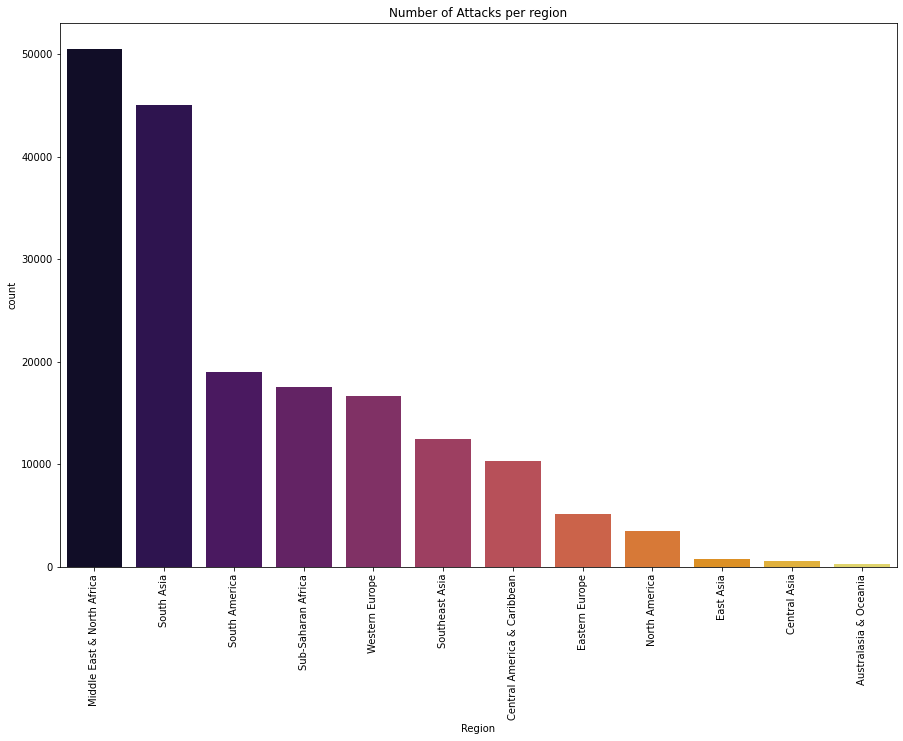

In [128]:
plt.subplots(figsize=(15,10))
sns.countplot('Region',data=terror,palette='inferno',order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks per region')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


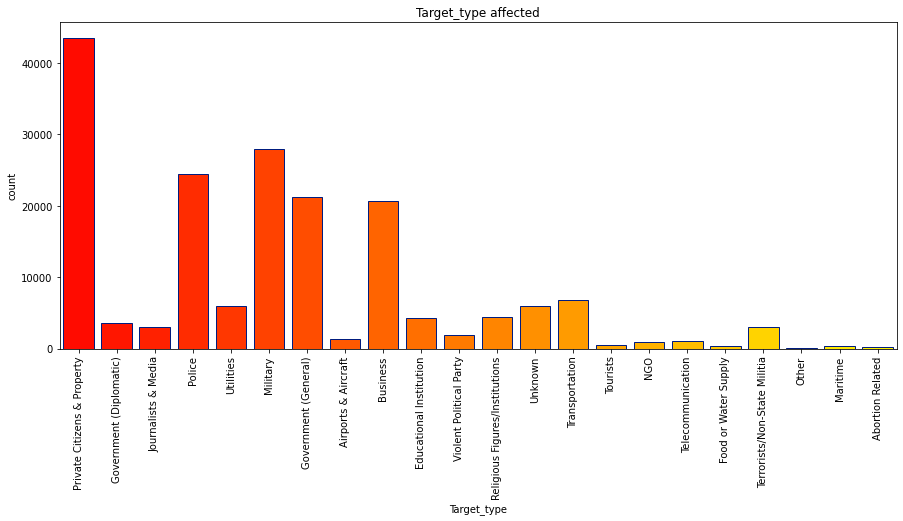

In [129]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror,palette='autumn',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=90)
plt.title('Target_type affected')
plt.show()

In [133]:
ss=df1.dropna()

In [135]:
ss.dtypes

eventid          int64
iyear            int64
iday             int64
success          int64
attacktype1      int64
targtype1        int64
natlty1        float64
weaptype1        int64
nkill          float64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
specificity    float64
vicinity         int64
crit1            int64
suicide          int64
nperps         float64
weaptype1        int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    90166
0    13874
Name: success, dtype: int64

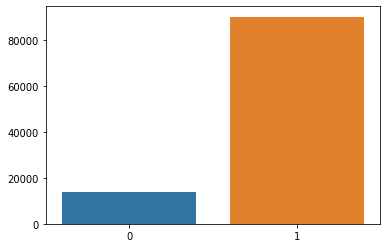

In [136]:
y = ss.success.value_counts()
sns.barplot(y.index, y.values)
y

In [137]:
X = ss.drop(['success'], axis=1, inplace=False)  
X

,eventid,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,weaptype1
1,197000000002,1970,0,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,0,7.0,13
5,197001010002,1970,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0,5
6,197001020001,1970,2,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0,5
7,197001020002,1970,2,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,0,-99.0,6
8,197001020003,1970,2,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,31,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,0,-99.0,5
181687,201712310029,2017,31,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,0,-99.0,6
181688,201712310030,2017,31,7,14,160.0,8,0.0,0,160,5,6.900742,124.437908,2.0,0,1,0,-99.0,8
181689,201712310031,2017,31,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,0,-99.0,6


In [138]:
Y=ss['success']
Y

1         1
5         1
6         0
7         1
8         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 104040, dtype: int64

In [139]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [142]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [143]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

# State is string and we want discreet integer values


In [144]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train_RF.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [145]:
feature_importances

,importance
targtype1,0.149368
eventid,0.121475
attacktype1,0.109331
nkill,0.107742
latitude,0.102282
longitude,0.100990
iday,0.081915
iyear,0.044435
natlty1,0.031280
country,0.029986


In [146]:
importances = clf.feature_importances_ 

[0.12147509 0.04443463 0.08191508 0.10933102 0.14936798 0.03128041
 0.01850914 0.10774224 0.00455785 0.02998608 0.01378489 0.10228238
 0.10098956 0.01668074 0.00820385 0.00152733 0.01213548 0.02789413
 0.01790212]


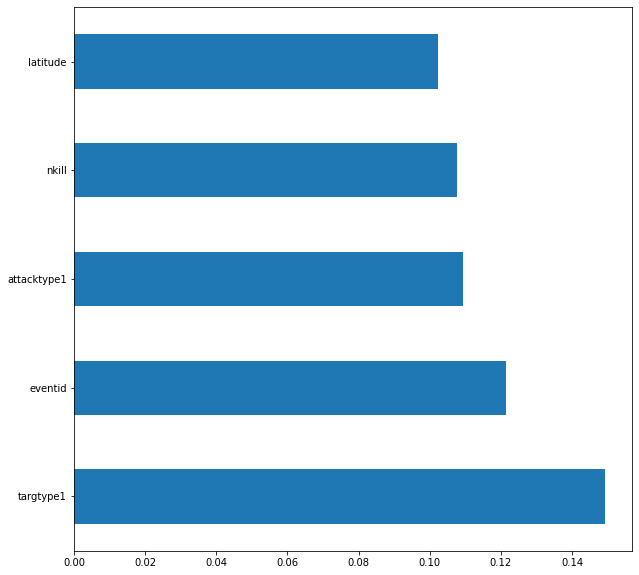

In [147]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

[0.12147509 0.04443463 0.08191508 0.10933102 0.14936798 0.03128041
 0.01850914 0.10774224 0.00455785 0.02998608 0.01378489 0.10228238
 0.10098956 0.01668074 0.00820385 0.00152733 0.01213548 0.02789413
 0.01790212]


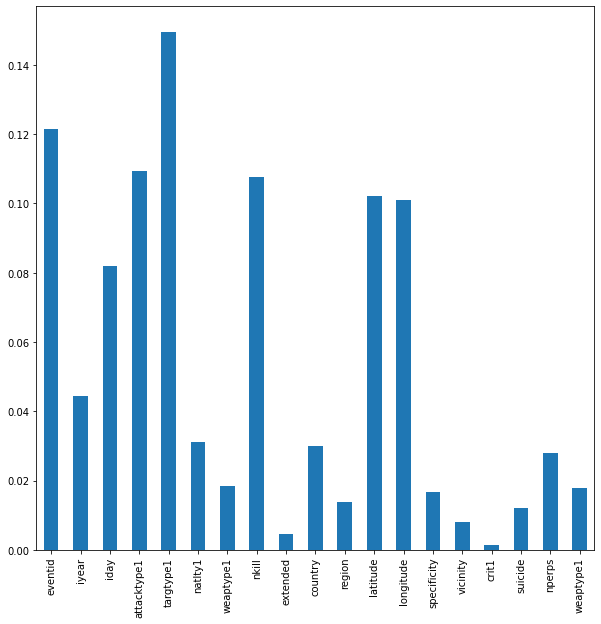

In [148]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances
feat_importances.plot(kind='bar' , figsize=(10,10)) 

In [149]:
indices = np.argsort(importances)[::-1]

In [150]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[1] # number of trees to visualise
# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot', 
                feature_names = X_train_RF.columns,
                #class_names = y_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# file will be saved in current working directory

In [151]:
for f in range(X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("feature name: ", X.columns[indices[f]])

1. feature 4 (0.149368)
feature name:  targtype1
2. feature 0 (0.121475)
feature name:  eventid
3. feature 3 (0.109331)
feature name:  attacktype1
4. feature 7 (0.107742)
feature name:  nkill
5. feature 11 (0.102282)
feature name:  latitude
6. feature 12 (0.100990)
feature name:  longitude
7. feature 2 (0.081915)
feature name:  iday
8. feature 1 (0.044435)
feature name:  iyear
9. feature 5 (0.031280)
feature name:  natlty1
10. feature 9 (0.029986)
feature name:  country
11. feature 17 (0.027894)
feature name:  nperps
12. feature 6 (0.018509)
feature name:  weaptype1
13. feature 18 (0.017902)
feature name:  weaptype1
14. feature 13 (0.016681)
feature name:  specificity
15. feature 10 (0.013785)
feature name:  region
16. feature 16 (0.012135)
feature name:  suicide
17. feature 14 (0.008204)
feature name:  vicinity
18. feature 8 (0.004558)
feature name:  extended
19. feature 15 (0.001527)
feature name:  crit1


In [152]:
y_pred_RF = clf.predict(X_test_RF)

In [153]:
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})


In [154]:
final_model_predictions_RF.head()


,Actual,predictions
135079,1,1
151904,1,1
173677,1,1
169196,1,1
148161,1,1


In [157]:
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

Misclassified samples: 2310
Accuracy: 0.9260


In [158]:
y_pred_prob = clf.predict_proba(X_test_RF)  

In [159]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1] 

In [160]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [161]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
135079,1,1,0.973000
151904,1,1,1.000000
173677,1,1,0.976417
169196,1,1,0.993000
148161,1,1,0.949000


In [162]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: agg


In [163]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

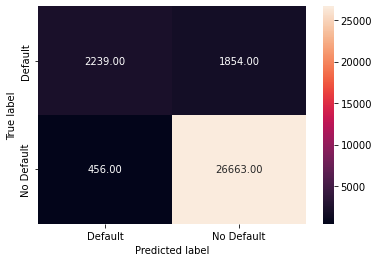

In [164]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )

In [165]:
accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

Total Accuracy :  93.00
recall : 0.9831852206939784
Precision : 0.934986148613108


In [166]:
cm1 = metrics.confusion_matrix( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.55
Specificity :  0.98


In [184]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


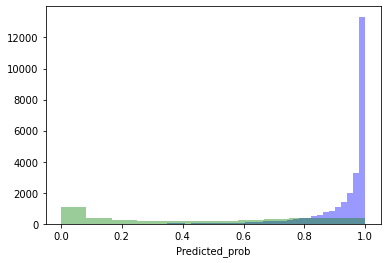

In [185]:
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 1]["Predicted_prob"], kde=False, color = 'b' )
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 0]["Predicted_prob"], kde=False, color = 'g' )

In [186]:
auc_score = metrics.roc_auc_score( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob  )
round( float( auc_score ), 2 )

0.93

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



rank. of the independent variables useful to predict target variable "success"
importance
targtype1	
eventid	0.121475
attacktype1	0.109331
nkill	0.107742
latitude	0.102282
longitude	0.100990
iday	0.081915
iyear	0.044435
natlty1	0.031280
country	0.029986
nperps	0.027894
weaptype1	0.018509
weaptype1	0.017902
specificity	0.016681
region	0.013785
suicide	0.012135
vicinity	0.008204
extended	0.004558
crit1

 Do the training and test sets have the same data?




NO

 In the predictor variables independent of all the other predictor variables?


To find this, we need to find if there is any correlation between the features. 
Let us plot a correlation heatmap to test this.


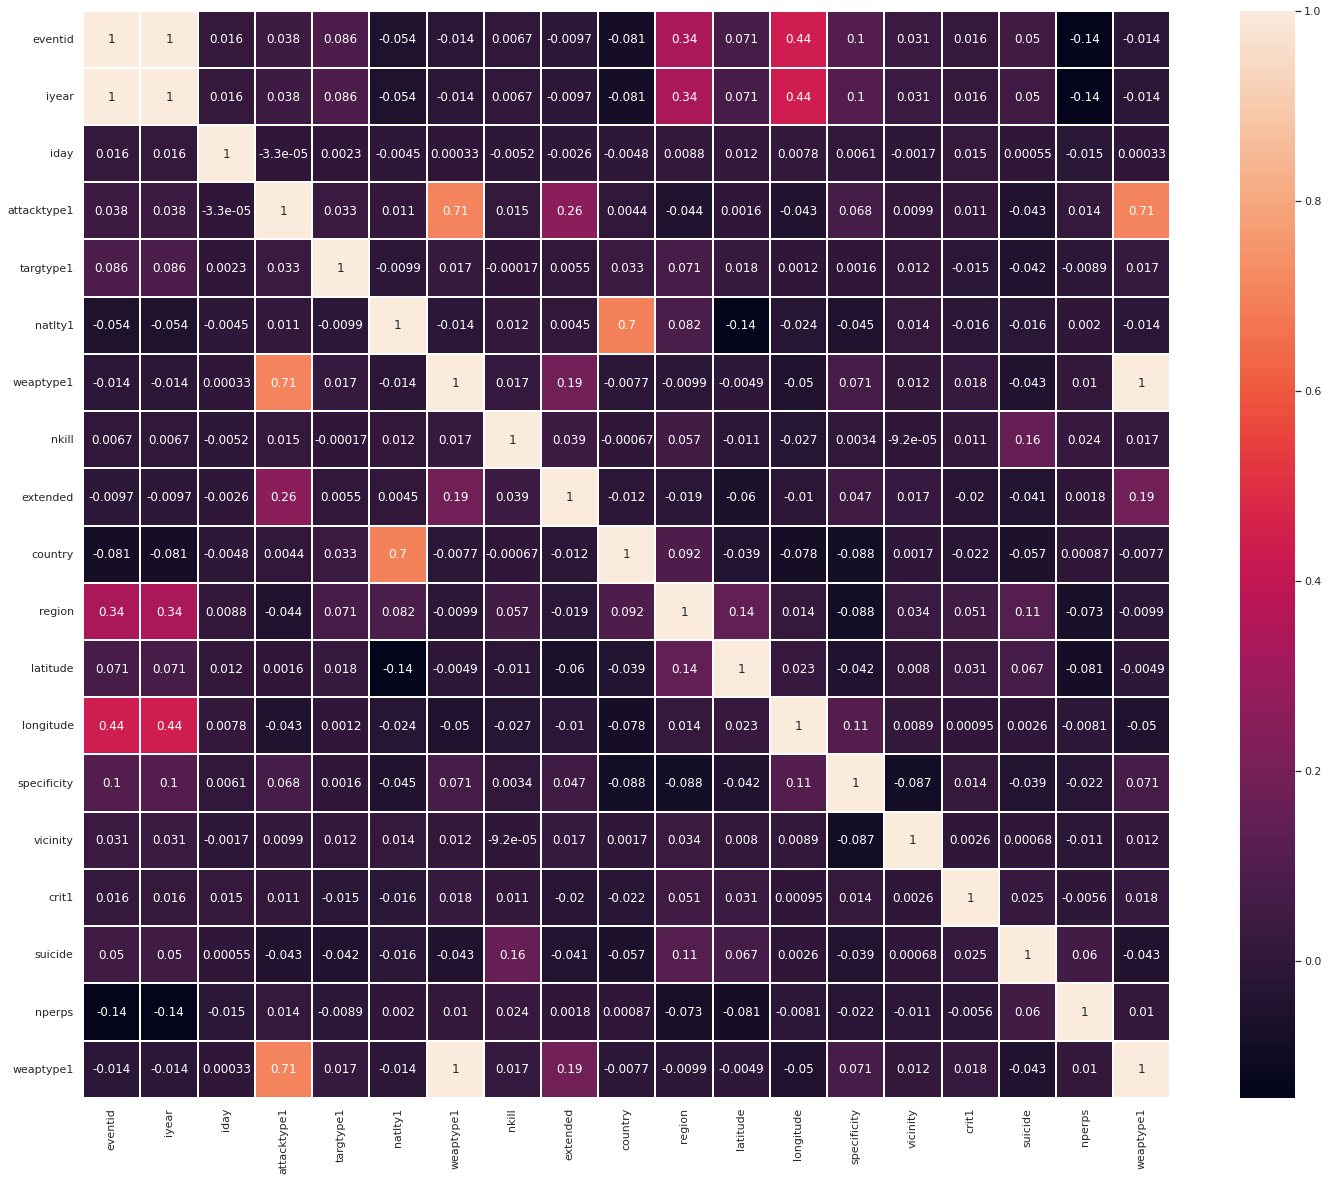

In [191]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(X.corr(), linewidths=1, annot = True, square =True , )

We can see there are lot of co-relation among the variables.

Which predictor variables are the most important?

targtype1	0.149368
eventid	0.121475
attacktype1	0.109331
nkill	0.107742
latitude	0.102282
longitude	0.100990

Do the ranges of the predictor variables make sense?



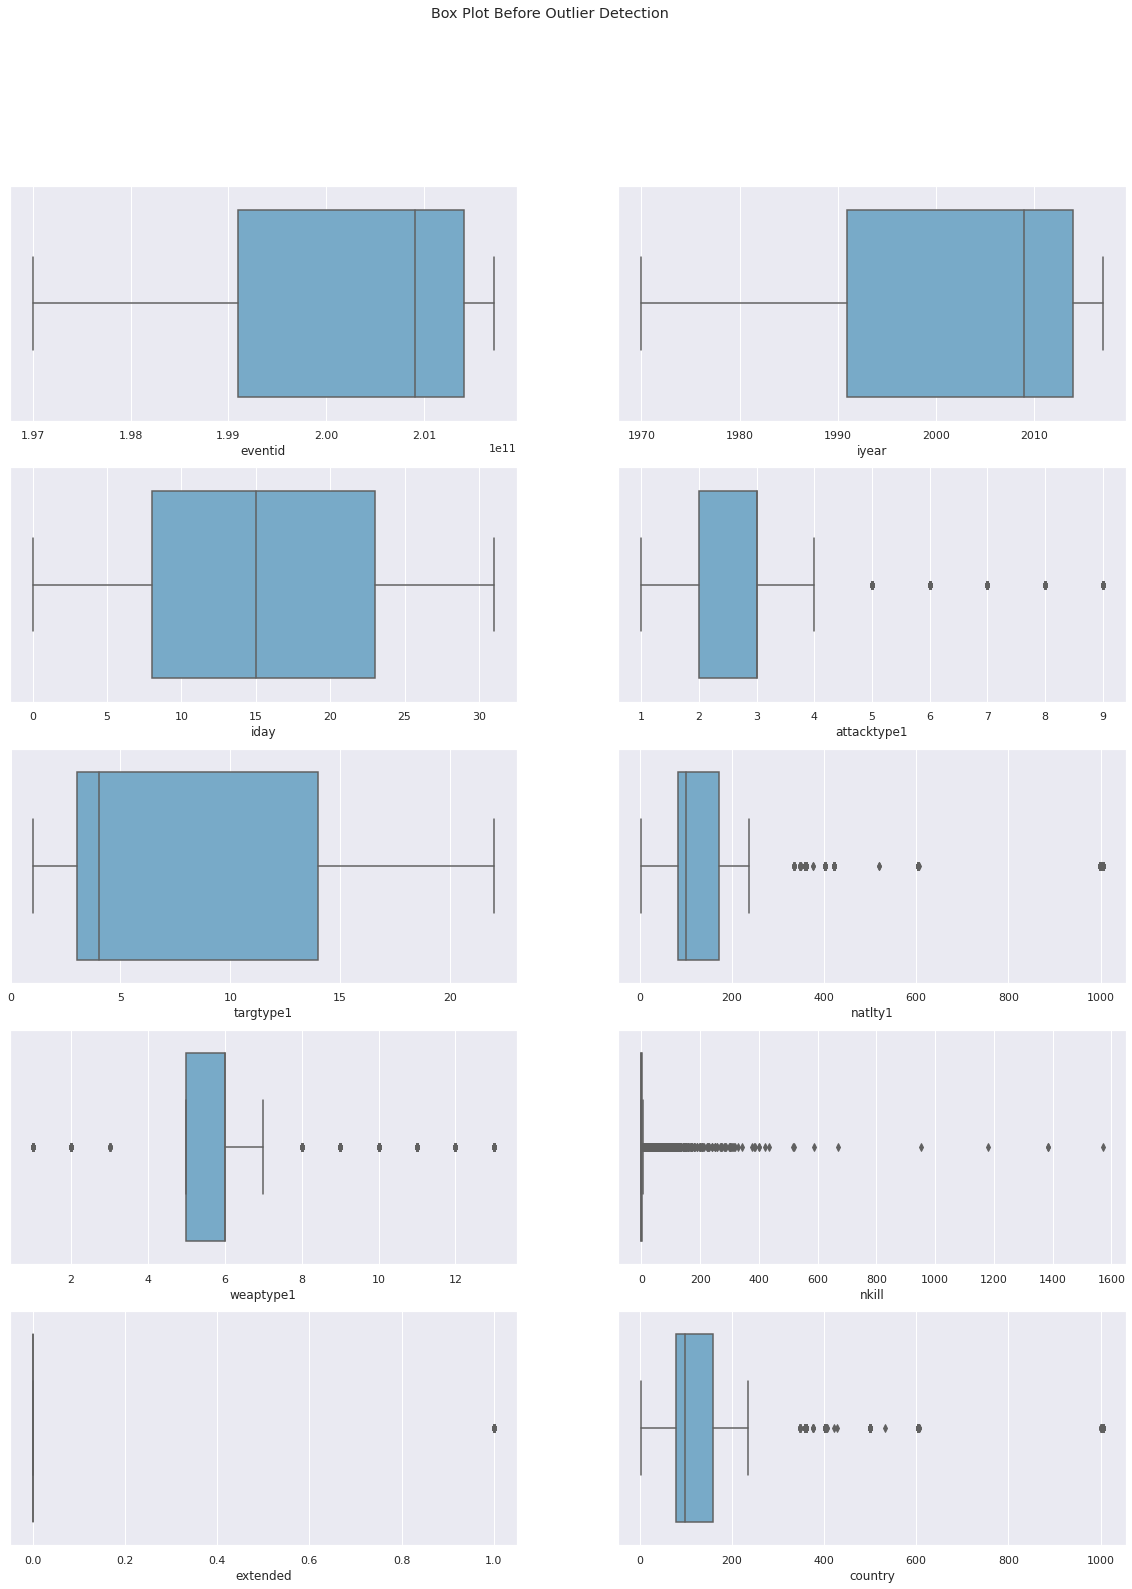

In [192]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=X.columns[k], palette="Blues")
        k=k+1

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?



In [211]:
data=df1[(df['attacktype1']<4) & (df['natlty1']<250) & (df['country']<250)]
data



,eventid,iyear,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,weaptype1
0,197000000001,1970,2,1,1,14,58.0,13,1.0,0,58,2,18.456792,-69.951164,1.0,0,1,0,NaN,13
2,197001000001,1970,0,1,1,10,217.0,13,1.0,0,160,5,15.478598,120.599741,4.0,0,1,0,NaN,13
3,197001000002,1970,0,1,3,7,217.0,6,NaN,0,78,8,37.997490,23.762728,1.0,0,1,0,NaN,6
5,197001010002,1970,1,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0,5
6,197001020001,1970,2,0,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,201712310020,2017,31,1,3,1,4.0,6,0.0,0,4,6,35.921051,64.774544,1.0,0,1,0,-99.0,6
181686,201712310022,2017,31,1,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,0,-99.0,5
181687,201712310029,2017,31,1,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,0,-99.0,6
181689,201712310031,2017,31,0,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,0,-99.0,6


In [212]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)


In [213]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)


In [214]:
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

In [215]:
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

Misclassified samples: 2310
Accuracy: 0.9260


Accuracy changes after removing outliers

**Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
df_region = df[['region']]-
df_region['region_copy_1_percent'] = df[['region']]
df_region['region_copy_5_percent'] = df[['region']]
df_region['region_copy_10_percent'] = df[['region']]
df_region['Index'] = range(1, len(df_region) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_region

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
print(get_percent_missing(df_region_participations))

In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(df_region, 0.01, 'region_copy_1_percent')
create_missing(df_region, 0.05, 'region_copy_5_percent')
create_missing(df_region, 0.1, 'region_copy_10_percent')

In [ ]:
print(get_percent_missing(df_region))

In [ ]:
# Store Index of NaN values in each coloumns
region_1_idx = list(np.where(df_region['region_copy_1_percent'].isna())[0])
region_5_idx = list(np.where(df_region['region_copy_5_percent'].isna())[0])
region_10_idx = list(np.where(df_region['region_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(region_1_idx)} and it contains {(len(region_1_idx)/len(df_region['region_copy_1_percent']))*100} % of total data in column | Total rows: {len(df_region['region_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(region_5_idx)} and it contains {(len(region_5_idx)/len(df_region['region_copy_5_percent']))*100} % of total data in column | Total rows: {len(df_region['region_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(region_10_idx)} and it contains {(len(region_10_idx)/len(df_region['region_copy_10_percent']))*100} % of total data in column | Total rows: {len(df_region['region_copy_10_percent'])}")

In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
df_region_v2 = df_region[['Index','region_copy_1_percent','region_copy_5_percent','region_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_region_v2), columns = df_region_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
#Check the % missing data in dataframe now
print(get_percent_missing(imputed_number_df))

In [ ]:
imputed_number_df['original_region'] = df_region['region']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_10_percent']

In [ ]:
imputed_number_df

In [ ]:
for i in region_10_idx:
    print(str(imputed_number_df['region_copy_10_percent'][i])+", "+str(imputed_number_df['region'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% Imputation =",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% Imputation =",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% Imputation =",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))


In [ ]:
acutual = imputed_number_df['original_region'].sum(axis=0) 
predicted_1_percent = imputed_number_df['region_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['region_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['region_copy_10_percent'].sum(axis=0) 
N = len(region_10_idx) - 1

bias_1_percent = (acutual - predicted_1_percent) / N
bias_5_percent = (acutual - predicted_5_percent) / N
bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",bias_1_percent)
print("Bias for 5 percent missing data is = ",bias_5_percent)
print("Bias for 10 percent missing data is = ",bias_10_percent)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df_region = df[['region']]
df_region['region_copy_1_percent'] = df[['region']]
df_region['region_copy_5_percent'] = df[['region']]
df_region['region_copy_10_percent'] = df[['region']]
df_region['Index'] = range(1, len(df_region) + 1)
# df_region['sample_num'] = df['sample_num']/1000
df_region

In [ ]:
print(get_percent_missing(df_region))

In [ ]:
create_missing(df_region, 0.01, 'region_copy_1_percent')
create_missing(df_region, 0.05, 'region_copy_5_percent')
create_missing(df_region, 0.1, 'region_copy_10_percent')

In [ ]:
print(get_percent_missing(df_region))

In [ ]:
# Store Index of NaN values in each coloumns
region_1_idx = list(np.where(df_region['region_copy_1_percent'].isna())[0])
region_5_idx = list(np.where(df_region['region_copy_5_percent'].isna())[0])
region_10_idx = list(np.where(df_region['region_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(region_1_idx)} and it contains {(len(region_1_idx)/len(df_region['region_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(region_5_idx)} and it contains {(len(region_5_idx)/len(df_region['region_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(region_10_idx)} and it contains {(len(region_10_idx)/len(df_region['region_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_10_percent'])}")

In [ ]:
df_region_v2 = df_region[['Index','region_copy_1_percent','region_copy_5_percent','region_copy_10_percent']]
imputer = SimpleImputer(strategy='most_frequent')
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_region_v2), columns = df_region_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
imputed_number_df['original_region'] = df_region['region']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_region'] - imputed_number_df['region_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

In [ ]:
for i in region_10_idx:
    print(str(imputed_number_df['region_copy_10_percent'][i])+", "+str(imputed_number_df['original_region'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% imputation: ",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% imputation: ",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% imputation: ",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

In [ ]:
acutual = imputed_number_df['original_region'].sum(axis=0) 
predicted_1_percent = imputed_number_df['region_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['region_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['region_copy_10_percent'].sum(axis=0) 
N = len(region_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df_region = df[['region']]
df_region['region_copy_1_percent'] = df[['region']]
df_region['region_copy_5_percent'] = df[['region']]
df_region['region_copy_10_percent'] = df[['region']]
df_region['Index'] = range(1, len(df_region) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_region

In [ ]:
print(get_percent_missing(df_region))

In [ ]:
create_missing(df_region, 0.01, 'region_copy_1_percent')
create_missing(df_region, 0.05, 'region_copy_5_percent')
create_missing(df_region, 0.1, 'region_copy_10_percent')

In [ ]:
print(get_percent_missing(df_region))

In [ ]:
# Store Index of NaN values in each coloumns
region_1_idx = list(np.where(df_region['region_copy_1_percent'].isna())[0])
region_5_idx = list(np.where(df_region['region_copy_5_percent'].isna())[0])
region_10_idx = list(np.where(df_region['region_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(region_1_idx)} and it contains {(len(region_1_idx)/len(df_region['region_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(region_5_idx)} and it contains {(len(region_5_idx)/len(df_region['region_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(region_10_idx)} and it contains {(len(region_10_idx)/len(df_region['region_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_region['region_copy_10_percent'])}")

In [ ]:
df_region_v2 = df_region[['Index','region_copy_1_percent','region_copy_5_percent','region_copy_10_percent']]
imputer = IterativeImputer()
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_region_v2), columns = df_region_v2.columns)

In [ ]:
imputed_number_df.sample(10)

Copyright (c) 2021 Swetha guruju

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.